# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,VotingClassifier
from xgboost import XGBClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
import warnings
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
from sklearn import model_selection
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold

# Uploading the data

In [71]:
df=pd.read_csv('adult.csv')
actualdf=pd.read_csv('adult.csv')

In [72]:
df.shape

(32561, 15)

###### **There are 32561 observations and 15 dimensions in the data**

###### The dimensions in the data are:

        Age -                   age of the person in the survey
        Sex -                   gender of the individual
        Native Country -  origin og the individual
        Race -                  race of the individual
        Education -          Education of the individual 
        Education Num- Number of years of study of individual
        Workclass -         Class of the work of the individual
        Occupation -        Occupation of the individual
        Hours per week -  Number of hours an individual works in a week
        Marital Status -   Status of the individual 
        Relationship -      Relation of the individual in the family
        Capital Gain -    capital gain incurred by the individual
        Capital Loss -    capital loss incurred by the induvidual
        Fnlwgt -            number of people who are 16+
        Income -           two classes of income <=50K or >50K   ( target feature)

######       There are 14 dependent dimensions
###### 6 numerical dimensions and
        Age -                   continuous
        Capital Gain -      continuous
        Capital Loss -      countinous
        Fnlwgt -              continuous
        Educcation Num- discrete:  education levels
        Hours per week - discrete 
###### 8 categorical dimensions
        Sex -                   categorical: Female or Male
        Native Country -  categorical : US, Mexico etc
        Race -                  categorical : White,Black,Asian etc
        Education -          categorical: HS-grad, Doctorate,Bachelors etc
        Workclass -         categorical: Private,self employed etc
        Occupation -        categorical : Manegerial,Sales etc
        Marital Status -  categorical: Widowed,Seperated etc 
        Relationship -      categorical: husband,wife etc
###### target dimension
        Income -             categorical : >50K,<=50K

# Exploratory Data Analysis - EDA

 ### bivariate

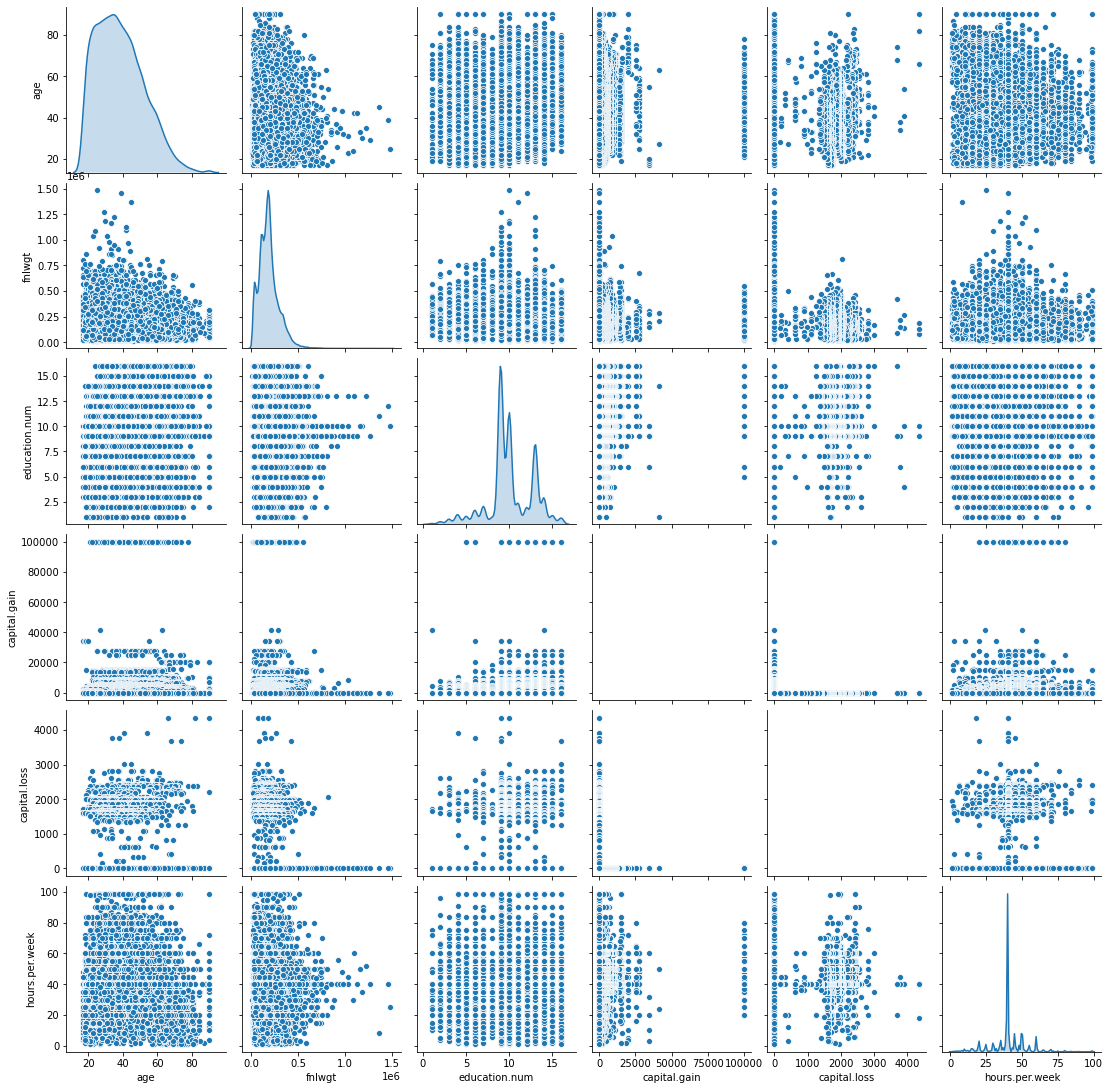

In [4]:
sns.pairplot(df,diag_kind='kde')

### UNIVARIATE

##### Categorical dimensions

WORKCLASS
                  counts       perc
Private            22696  69.703019
Self-emp-not-inc    2541   7.803814
Local-gov           2093   6.427935
?                   1836   5.638647
State-gov           1298   3.986364
Self-emp-inc        1116   3.427413
Federal-gov          960   2.948312
Without-pay           14   0.042996
Never-worked           7   0.021498


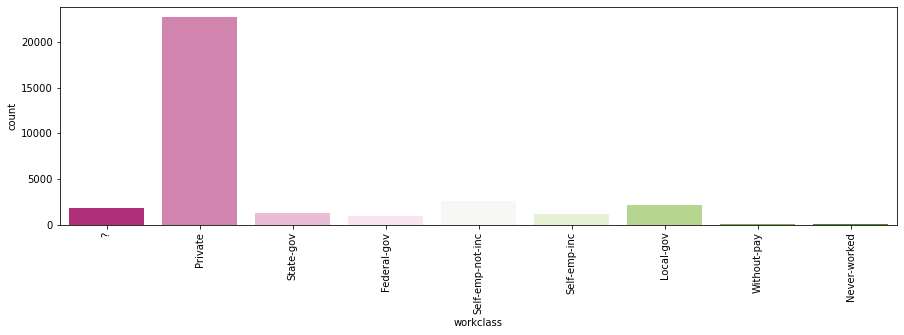

EDUCATION
              counts       perc
HS-grad        10501  32.250238
Some-college    7291  22.391818
Bachelors       5355  16.446055
Masters         1723   5.291607
Assoc-voc       1382   4.244341
11th            1175   3.608612
Assoc-acdm      1067   3.276926
10th             933   2.865391
7th-8th          646   1.983969
Prof-school      576   1.768987
9th              514   1.578576
12th             433   1.329812
Doctorate        413   1.268389
5th-6th          333   1.022696
1st-4th          168   0.515955
Preschool         51   0.156629


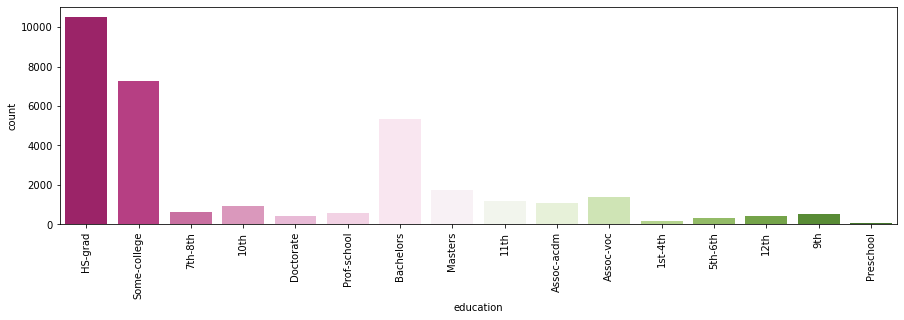

MARITAL.STATUS
                       counts       perc
Married-civ-spouse      14976  45.993673
Never-married           10683  32.809189
Divorced                 4443  13.645158
Separated                1025   3.147938
Widowed                   993   3.049661
Married-spouse-absent     418   1.283744
Married-AF-spouse          23   0.070637


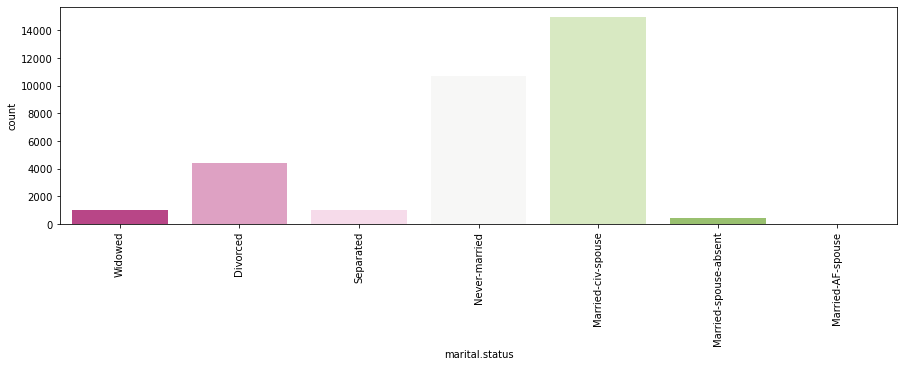

OCCUPATION
                   counts       perc
Prof-specialty       4140  12.714597
Craft-repair         4099  12.588680
Exec-managerial      4066  12.487331
Adm-clerical         3770  11.578268
Sales                3650  11.209729
Other-service        3295  10.119468
Machine-op-inspct    2002   6.148460
?                    1843   5.660146
Transport-moving     1597   4.904641
Handlers-cleaners    1370   4.207487
Farming-fishing       994   3.052732
Tech-support          928   2.850035
Protective-serv       649   1.993182
Priv-house-serv       149   0.457603
Armed-Forces            9   0.027640


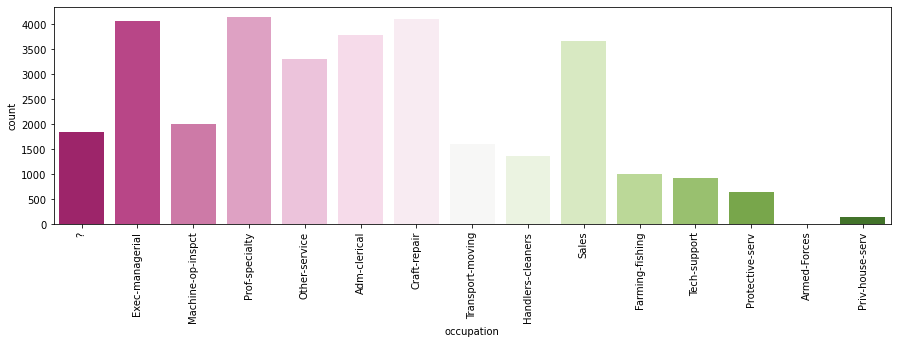

RELATIONSHIP
                counts       perc
Husband          13193  40.517797
Not-in-family     8305  25.505973
Own-child         5068  15.564633
Unmarried         3446  10.583213
Wife              1568   4.815577
Other-relative     981   3.012807


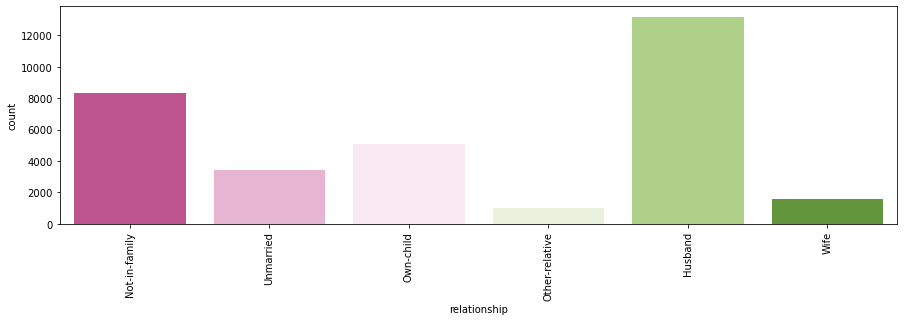

RACE
                    counts       perc
White                27816  85.427352
Black                 3124   9.594300
Asian-Pac-Islander    1039   3.190934
Amer-Indian-Eskimo     311   0.955130
Other                  271   0.832284


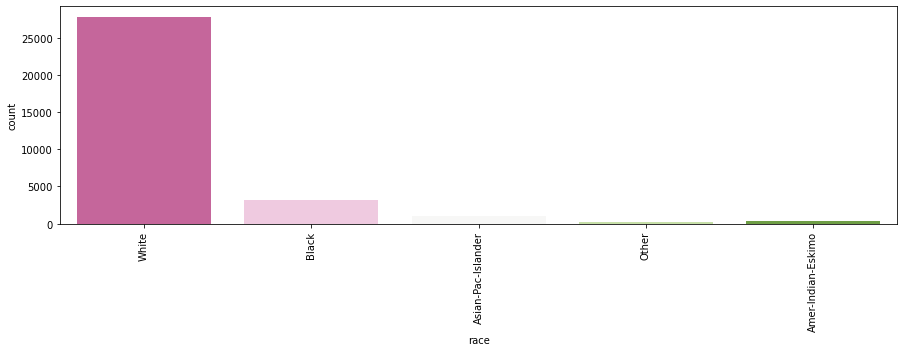

SEX
        counts       perc
Male     21790  66.920549
Female   10771  33.079451


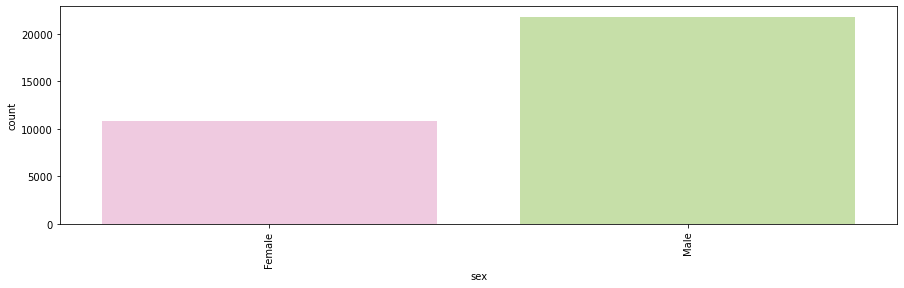

NATIVE.COUNTRY
                            counts       perc
United-States                29170  89.585701
Mexico                         643   1.974755
?                              583   1.790486
Philippines                    198   0.608089
Germany                        137   0.420749
Canada                         121   0.371610
Puerto-Rico                    114   0.350112
El-Salvador                    106   0.325543
India                          100   0.307116
Cuba                            95   0.291760
England                         90   0.276404
Jamaica                         81   0.248764
South                           80   0.245693
China                           75   0.230337
Italy                           73   0.224195
Dominican-Republic              70   0.214981
Vietnam                         67   0.205768
Guatemala                       64   0.196554
Japan                           62   0.190412
Poland                          60   0.184270
Columbia           

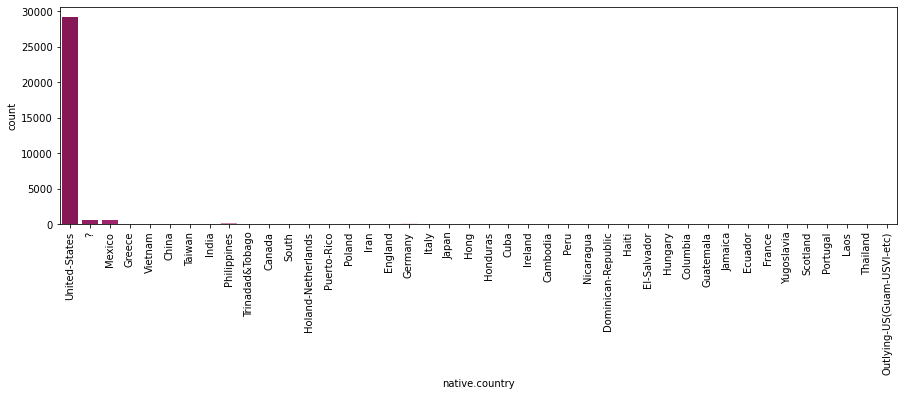

INCOME
       counts       perc
<=50K   24720  75.919044
>50K     7841  24.080956


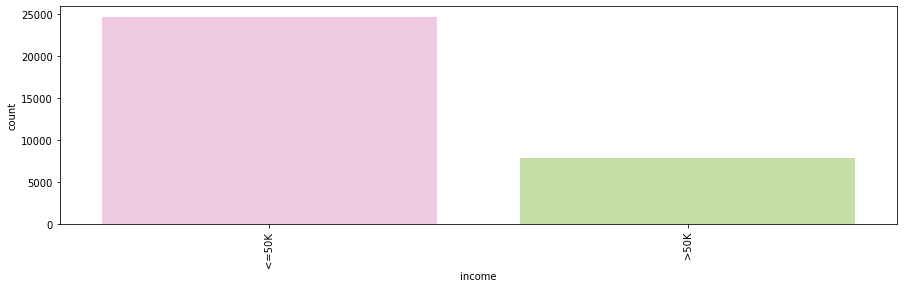

In [5]:
for i in df.select_dtypes(include="object"):
    # selecting all the categorical columns
    x=pd.DataFrame({"counts":df[i].value_counts(),"perc":df[i].value_counts(normalize=True)*100},index=df[i].value_counts().index)
    # creating a data frame with the value counts and their percentages
    print(i.upper())
    # printing the column name
    print(x)
    # printing the data frame
    plt.figure(figsize=(15,4))
    sns.countplot(df[i],palette="PiYG")
    # plotting a countplot since theya re categorical features
    plt.xticks(rotation=90)
    # setting ticks at 90 degrees for better view
    plt.show()

**Workclass**
1. Private occupies the highest percentage with 69.7%, and self employed with 7%
2. Other classes have low percentages with never worked being the lowest 

**Education**
1. Most people are high school graduates followed by some college while preschool is the lowest 
2. Doctrorate and prof school, the highest level also is low comparitively

**Marital Status**
1. Married with civilians occupy the highest and those to armed forces the lowest
2. Never married is the second indicating more people in the age below 40

**Occupation**
1.  Intellectual jobs seem to occupy the high percentages while manual the lowest

**Relationship**
1. Husbands work a lot more than anyone, Wife is second to lowest having only about 5%

**Race**
1. Since most of the data is from USA the whites tend towards the highest having 85% of the records
2. this is followed by blacks, asians, american indians and others

**Sex**
1. Males are about two thirds of the records and females are only one third

**Native country**
1. Unites States have the highest with 89.5% followed by Mexico with 1.9%

**Income**
1. 75% of the records belong to income class <=50K
2. 25% of the records belong to income class >50K

##### Numerical dimensions

AGE
count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


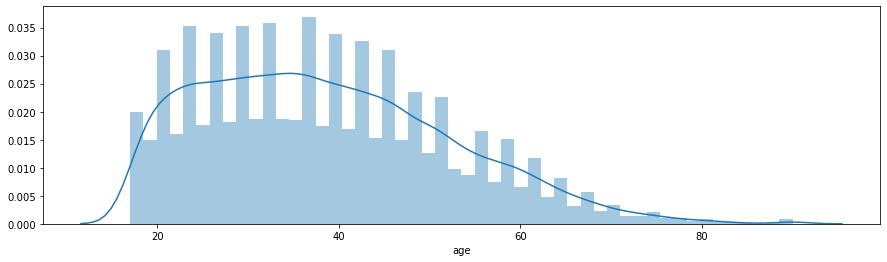

FNLWGT
count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


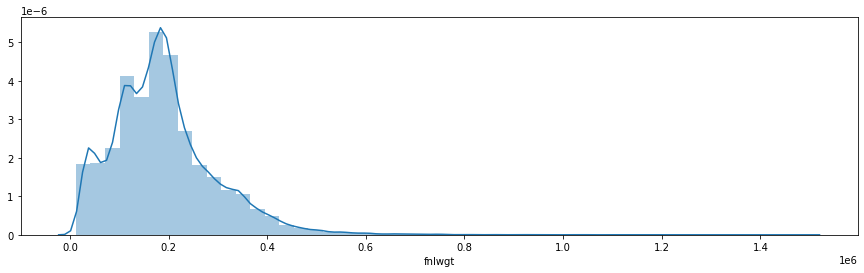

EDUCATION.NUM
count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education.num, dtype: float64


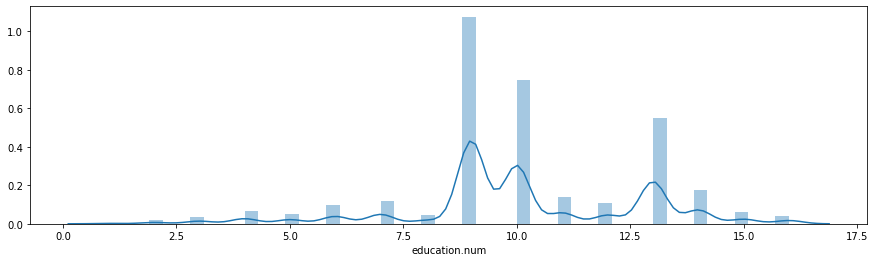

CAPITAL.GAIN
count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64


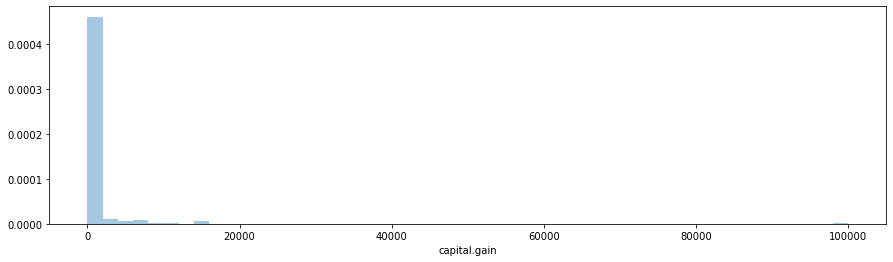

CAPITAL.LOSS
count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital.loss, dtype: float64


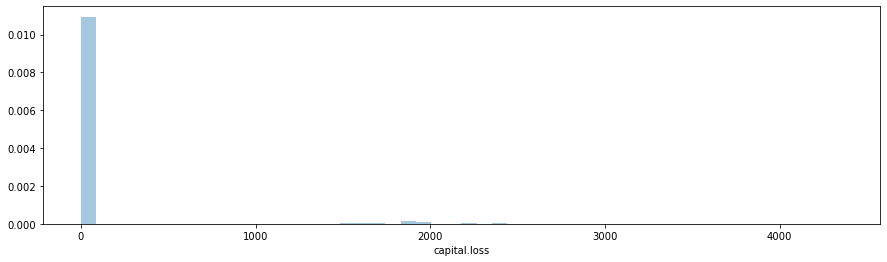

HOURS.PER.WEEK
count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64


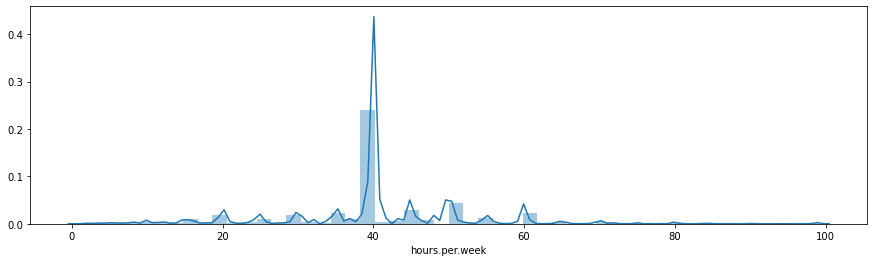

In [6]:
for i in df.select_dtypes(exclude="object"):
    # selecting all features which are numerical in nature
    print(i.upper())
    # printing the column name
    print(df[i].describe())
    # descriptive statistics of the feature
    plt.figure(figsize=(15,4))
    sns.distplot(df[i])
    #distribution plot of the feature
    plt.show()

**Age**
1. The lowest age that was eligible for the census shows that it was 17 while the highest was 90 years
2. Age as we can see has a steady growth till 40 years and then it gradually drops
3. Most people who work are around ages 20-40
4. People below 20 and people above 80 were always in the income class <=50K

**capital gain**
1. Most people have capital gains 0
2. Of the people with capita gain few people have higher gains

**capital loss**
1. Very similar to capital gains

**Hours per week**
1. most people work from 20-60 hours of which again most of them work for 40 hours per week
2. People working more than 60 usually are self employed and manual based workclass 

# Data preparation

In [7]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


    The data has    ?    which are the missing values
    They have to be replaced with nan
    The data has null values that we need to clean and prepare for further

In [73]:
df.replace({'?':np.nan},inplace=True)
# replacing the ? with null values
actualdf.replace({'?':np.nan},inplace=True)

In [74]:
df.isnull().sum()[df.isnull().sum()>0]
# selecting the features and the null values where they are present

workclass         1836
occupation        1843
native.country     583
dtype: int64

In [75]:
df.isnull().sum()[df.isnull().sum()>0]*100/df.shape[0]
# calculating the percentage of null values in each feature

workclass         5.638647
occupation        5.660146
native.country    1.790486
dtype: float64

In [76]:
df[df.workclass.isnull()].occupation.unique()
# selecting the unique values in occupation feature whereever workclass is missing

array([nan], dtype=object)

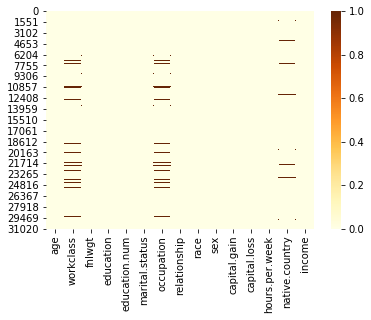

In [77]:
sns.heatmap(df.isnull(),cmap="YlOrBr")
# a heatmap of the null values

    The above code proves that whenever workclass is missing the occupation is also missing
    There is about    5-6% of missing values in the data

#### dealing with education and education number

In [78]:
for i in sorted(df['education.num'].unique()):
    # selecting the unique values in the education number feature
    a=df[df['education.num']==i].education.unique()
    # selecting the unique values in the education feature with that education number
    print(i,"   :  ",a)
    # printing the education number and the education values

1    :   ['Preschool']
2    :   ['1st-4th']
3    :   ['5th-6th']
4    :   ['7th-8th']
5    :   ['9th']
6    :   ['10th']
7    :   ['11th']
8    :   ['12th']
9    :   ['HS-grad']
10    :   ['Some-college']
11    :   ['Assoc-voc']
12    :   ['Assoc-acdm']
13    :   ['Bachelors']
14    :   ['Masters']
15    :   ['Prof-school']
16    :   ['Doctorate']


In [79]:
pd.DataFrame(df[df.income==">50K"]['education.num'].value_counts()*100/df['education.num'].value_counts())
# creating a dataframe with all observations of income class >50K
# selecting the education number
# calculating the value counts in each number
# calculating the percentage over the observations in class >50K over the total observations for each education number

,education.num
1,NaN
2,3.571429
3,4.804805
4,6.191950
5,5.252918
6,6.645230
7,5.106383
8,7.621247
9,15.950862
10,19.023454


    Education Number and education are the same
    Also we can see that as the educational level increases, the probability of being in income class >50K is also high
    Hence we are only considering education number for further analysis

In [80]:
df.drop('education',1,inplace=True)
# removing the feature permanently from the dataset

  #### dealing with wrong data points 

In [81]:
pd.crosstab(df.sex,df.relationship)
# the counts for the combinations of sex and relationship catgeories

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
sex,,,,,,
Female,1,3875,430,2245,2654,1566
Male,13192,4430,551,2823,792,2


    As we can see though the realtionship is husband they have been classified as female
    Similaly male have been put under wife

In [82]:
df[df.sex=="Female"][df.relationship=="Husband"]
# selecting obserations with sex as female and relationship as husband

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
10408,34,Private,175878,9,Married-civ-spouse,Sales,Husband,White,Female,0,0,40,United-States,<=50K


In [83]:
df[df.sex=="Male"][df.relationship=="Wife"]
# selecting obserations with sex as male and relationship as wife

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4733,29,Private,350162,13,Married-civ-spouse,Exec-managerial,Wife,White,Male,0,0,40,United-States,>50K
27851,36,Private,74791,13,Married-civ-spouse,Sales,Wife,White,Male,0,0,60,NaN,<=50K


In [84]:
df.loc[4733,'sex']='Female'
# replacing the value for male as female

In [85]:
df.loc[27851,'sex']='Female'
# replacing the value for male as female

In [86]:
df.loc[10408,'sex']='Male'
# replacing the value for female as male

# Dealing with null values

## Method 1: Dropping them

In [87]:
df_nadropped=df.dropna()
# removing all null values from the data and storing under a new dataset

In [88]:
df_nadropped.shape

(30162, 14)

In [89]:
df.shape[0]-df_nadropped.shape[0]

2399

In [90]:
(df.shape[0]-df_nadropped.shape[0])*100/df.shape[0]
# percentage of difference of total observations in actual data and the data with null values removed

7.36770983692147

In [91]:
df.isnull().sum()[df.isnull().sum()>0]*100/df.shape[0]

workclass         5.638647
occupation        5.660146
native.country    1.790486
dtype: float64

    There is about 7.36% of null values in the data
    They exist in workclass, occupation and native country
    Workclass and occupation are simultaneously missing with 5.6% each
    Native country has about 2% missing values

In [92]:
df_nadropped.income=df_nadropped.income.replace({'>50K':1,"<=50K":0})
df_nadropped.head(2)

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0


## Method 2 : Frequent value imputation

In [93]:
df_mode=df.copy()

In [94]:
df_mode.shape

(32561, 14)

In [95]:
df.workclass.value_counts()[:3]

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Name: workclass, dtype: int64

In [96]:
df_mode.workclass.fillna(value="Private",inplace=True)
# filling the value with the most frequent value in the workclass feature

In [97]:
df.occupation.value_counts()[:3]

Prof-specialty     4140
Craft-repair       4099
Exec-managerial    4066
Name: occupation, dtype: int64

In [98]:
df_mode.occupation.fillna(value="Prof-specialty",inplace=True)
# filling the value with the most frequent value in the occupation feature

In [99]:
df['native.country'].value_counts()[:3]

United-States    29170
Mexico             643
Philippines        198
Name: native.country, dtype: int64

In [100]:
df_mode['native.country'].fillna(value="United-States",inplace=True)
# filling the value with the most frequent value in the country feature

In [101]:
df_mode.income=df_mode.income.replace({'>50K':1,"<=50K":0})
df_mode.head(2)
# replacing the income feature values as 0 and 1

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0


## Method 3 : KNN Imputation

    Creating dictionaries based on weightages of the income class >50K

In [102]:
# Steps:
# intialise number as 1
# create a new dictionary
# calculate the percentage of income class observations over total observations for each category
# create a data frame with percentages sorted in ascending order
# assign 1 for lowest percentage, 2 for next and so on.. for all categories


num=1
ms_dict={}
for i in pd.DataFrame(df[df.income==">50K"]['marital.status'].value_counts()*100/df['marital.status'].value_counts()).sort_values('marital.status').index:
    ms_dict[i]=num
    num=num+1


num=1
occ_dict={}
for i in pd.DataFrame(df[df.income==">50K"]['occupation'].value_counts()*100/df['occupation'].value_counts()).sort_values('occupation').index:
    occ_dict[i]=num
    num=num+1

num=1
race_dict={}
for i in pd.DataFrame(df[df.income==">50K"]['race'].value_counts()*100/df['race'].value_counts()).sort_values('race').index:
    race_dict[i]=num
    num=num+1

num=1
rel_dict={}
for i in pd.DataFrame(df[df.income==">50K"]['relationship'].value_counts()*100/df['relationship'].value_counts()).replace({np.nan:0}).sort_values('relationship').index:
    rel_dict[i]=num
    num=num+1

num=1
sex_dict={}
for i in pd.DataFrame(df[df.income==">50K"]['sex'].value_counts()*100/df['sex'].value_counts()).replace({np.nan:0}).sort_values('sex').index:
    sex_dict[i]=num
    num=num+1

num=1
country_dict={}
for i in pd.DataFrame(df[df.income==">50K"]['native.country'].value_counts()*100/df['native.country'].value_counts()).replace({np.nan:0}).sort_values('native.country').index:
    country_dict[i]=num
    num=num+1

num=1
wc_dict={}
for i in pd.DataFrame(df[df.income==">50K"]['workclass'].value_counts()*100/df['workclass'].value_counts()).replace({np.nan:0}).sort_values('workclass').index:
    wc_dict[i]=num
    num=num+1

    creating a reverse dictionary to retreive the categorical features from numerical to categorical

In [103]:
# steps:
# dictionary creating a above is reversed
# selecting every key value pair and assigning the key as value for value as key

rev_sex={}
for value, key in sex_dict.items():
    rev_sex[key]=value
    
    
rev_occ={}
for value, key in occ_dict.items():
    rev_occ[key]=value
    
    
rev_rel={}
for value, key in rel_dict.items():
    rev_rel[key]=value
    
    
rev_country={}
for value, key in country_dict.items():
    rev_country[key]=value
    
rev_race={}
for value, key in race_dict.items():
    rev_race[key]=value
    
    
rev_ms={}
for value, key in ms_dict.items():
    rev_ms[key]=value
    
    
rev_wc={}
for value, key in wc_dict.items():
    rev_wc[key]=value

In [104]:
sex_dict

{'Female': 1, 'Male': 2}

In [105]:
rev_sex

{1: 'Female', 2: 'Male'}

In [106]:
df_knn=df.copy()

In [107]:
df_knn.occupation=df_knn.occupation.map(occ_dict)
# mapping the occupation dictionary to convert to numerical

df_knn.workclass=df_knn.workclass.map(wc_dict)
# mapping the workclass dictionary to convert to numerical

df_knn.relationship=df_knn.relationship.map(rel_dict)
# mapping the relationship dictionary to convert to numerical

df_knn['native.country']=df_knn['native.country'].map(country_dict)
# mapping the country dictionary to convert to numerical

df_knn.race=df_knn.race.map(race_dict)
# mapping the race dictionary to convert to numerical

df_knn['marital.status']=df_knn['marital.status'].map(ms_dict)
# mapping the marital status dictionary to convert to numerical

df_knn.sex=df_knn.sex.map(sex_dict)
# mapping the sex dictionary to convert to numerical

df_knn.income=df_knn.income.replace({'>50K':1,"<=50K":0})
# converting the income classes into binomial classes

df_knn.head(2)

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,9,4,NaN,4,4,1,0,4356,40,24.0,0
1,82,3.0,132870,9,4,14.0,4,4,1,0,4356,18,24.0,0


    Assuming 30 as n neighbors

In [108]:
df_knn=df_knn.drop('fnlwgt',1)
# removing the fnlwgt feature permanently

knn=KNNImputer(n_neighbors=30)
# selecting k neighbors as 30 for imputation

df_knn=pd.DataFrame(np.round(knn.fit_transform(df_knn)),columns=df_knn.columns)
# creating the dataframe by transformation caused by knn imputation and rounding them

df_knn_num=df_knn.copy()

In [109]:
df_knn.isnull().sum()[df_knn.isnull().sum()>0]

Series([], dtype: int64)

    Workclass imputed values

In [110]:
pd.DataFrame(df_knn[actualdf.workclass.isnull()==True].workclass.value_counts().values,
             index=df_knn[actualdf.workclass.isnull()==True].workclass.value_counts().index.map(rev_wc))

# selecting observations in actual data where workclass is null
# selecting these observations in the knn imputed dataset
# selecting value counts on such observations 
# mapping the index values which are numercial with the reverse  workclass dictionary created

,0
State-gov,930
Private,816
Self-emp-not-inc,89
Local-gov,1


    occupation imputed values

In [111]:
pd.DataFrame(df_knn[actualdf.occupation.isnull()==True].occupation.value_counts().values,
             index=df_knn[actualdf.occupation.isnull()==True].occupation.value_counts().index.map(rev_occ))

# selecting observations in actual data where occupation is null
# selecting these observations in the knn imputed dataset
# selecting value counts on such observations 
# mapping the index values which are numercial with the reverse  occupation dictionary created

,0
Adm-clerical,471
Transport-moving,419
Machine-op-inspct,325
Craft-repair,250
Sales,131
Farming-fishing,98
Tech-support,89
Protective-serv,45
Prof-specialty,8
Armed-Forces,7


    Country imputed values

In [112]:
pd.DataFrame(df_knn[actualdf['native.country'].isnull()==True]['native.country'].value_counts().values,
             index=df_knn[actualdf['native.country'].isnull()==True]['native.country'].value_counts().index.map(rev_country))


# selecting observations in actual data where country is null
# selecting these observations in the knn imputed dataset
# selecting value counts on such observations 
# mapping the index values which are numercial with the reverse  country dictionary created

,0
United-States,316
Hungary,121
Scotland,79
Ireland,32
Poland,12
Thailand,5
Cuba,5
Ecuador,3
Laos,2
South,2


    Reversing categorical data

In [113]:
df_knn.workclass=df_knn.workclass.map(rev_wc)
# mapping the reverse workclass  dictionary to convert back to categorical

df_knn.occupation=df_knn.occupation.map(rev_occ)
# mapping the reverse occupation  dictionary to convert back to categorical

df_knn.relationship=df_knn.relationship.map(rev_rel)
# mapping the reverse relationship  dictionary to convert back to categorical

df_knn.race=df_knn.race.map(rev_race)
# mapping the reverse race  dictionary to convert back to categorical

df_knn.sex=df_knn.sex.map(rev_sex)
# mapping the reverse sex  dictionary to convert back to categorical

df_knn['native.country']=df_knn['native.country'].map(rev_country)
# mapping the reverse country  dictionary to convert back to categorical

df_knn['marital.status']=df_knn['marital.status'].map(rev_ms)
# mapping the reverse marital status  dictionary to convert back to categorical

df_knn.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90.0,State-gov,9.0,Widowed,Sales,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,0.0
1,82.0,Private,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,0.0
2,66.0,Private,10.0,Widowed,Sales,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,0.0
3,54.0,Private,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,0.0
4,41.0,Private,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0.0


## Method 4 :  Only US data

In [114]:
df_us=df[df['native.country']=='United-States'].dropna()
# selecting observations with country as US
# dropping the null values in that dataset

df_us.income=df_us.income.replace({'>50K':1,"<=50K":0})
# mapping the income fetaure categories with 0 and 1

In [115]:
df_us.shape

(27504, 14)

In [116]:
df_us.drop(['native.country'],1,inplace=True)

because all the data belongs to one country, the native country dimension is not necessary hence not considering

# Statistical testing

In [117]:
num=df_nadropped.select_dtypes(exclude='object')
# selecting all the numerical features in the data

cat=pd.concat([df_nadropped.select_dtypes(include='object'),df_nadropped.income],1)
# seecting all categorical features
# concatenating the income catgegory as well


#### Statistical testing for Numerical variables

using **one way anova** because income is categorical in nature and the other features are continuous in nature
      
we can also use **ttest_ind** in case of binary class categorical feature and continuous feature

In [118]:
dimensions=[]
# creating a new list to capture the feature names

test_stat=[]
# creating a new list to capture the feature test statistic

p_values=[]
# creating a new list to capture the feature test p values

explain=[]
# creating a new list to capture the yes or no based on p values

In [119]:
for i in num.columns[:-1]:
    # selecting the numerical features except the income class
    
    print(i.upper())
    # printing the column name
    
    dimensions.append(i)
    # appending the column name to the list
    
    A=df_nadropped[df_nadropped.income==1][i]
    # selecting the column from data with income class 1
    
    B=df_nadropped[df_nadropped.income==0][i]
    # selecting the column from data with income class 0
    
    print("Null Hypothesis: There is no significant statistical difference between two income groups for the feature ",i)
    # formulating the null hypothesis
    
    print("Alternate Hypothesis: There is a significant statistical difference between two income groupsfor the feature ",i)
    # formulating the alternate hypothesis
    
    print(" ")
    print("H0:_ mean ",i," of income class <= 50K    =  mean ",i, " of income class >50K")
    # formulating the mathematical equation for null hypothesis
    
    print("HA:_ mean ",i," of income class <= 50K    !=  mean ",i, " of income class >50K")
    # formulating the mathematical equation for alternate  hypothesis
    print(" ")
    mean_A=np.mean(A)
    # calculating the mean of the feature with income class 0
    
    mean_B=np.mean(B)
    # calculating the mean of the feature with income class 1
    
    print("  ")
    print("Mean ",i, " of income class >50K is:_ ",np.mean(A))
    print("Mean ",i, " of income class <=50K is:_ ",np.mean(B))
    # printing the means calculated
    
    if mean_A<mean_B:
        print("Mean ",i, " of income class >50K is higher than income class <=50K")
    else:
        print("Mean ",i, " of income class <=50K is higher than income class >50K")
    print("  ")
    
    print(stats.f_oneway(A,B))
    # printing the test statistics for the groups
    
    test_stat.append(stats.f_oneway(A,B).statistic)
    p_values.append(stats.f_oneway(A,B).pvalue)
    # appending the test statistic and the p values to the respective lists
    
    if stats.f_oneway(A,B).pvalue<=0.05:
        print("pvalue <= 0.05 reject null hypothesis")
        print("Since p value is less than 0.05, we reject the null hypothesis")
        print(" ")
        print("There is a significant statistical difference between the two oncome groups for the feature ",i)
        print("The feature ",i," is able to explain the variability of the target dimension")
        print("  ")
        explain.append("yes")
    else:
        print("pvalue > 0.05 fail to reject null hypothesis")
        print("Since p value is greater than 0.05, we fail to reject the null hypothesis")
        print("  ")
        print("There is NO significant statistical difference between the two oncome groups for the feature ",i)
        print("The feature ",i," is UNABLE to explain the variability of the target dimension")
        explain.append("NO")
        
    # comparing the test statstics and the p values and concluding the hypothesis testing
    
    print("  ")
    print("  ")

AGE
Null Hypothesis: There is no significant statistical difference between two income groups for the feature  age
Alternate Hypothesis: There is a significant statistical difference between two income groupsfor the feature  age
 
H0:_ mean  age  of income class <= 50K    =  mean  age  of income class >50K
HA:_ mean  age  of income class <= 50K    !=  mean  age  of income class >50K
 
  
Mean  age  of income class >50K is:_  43.95911028236548
Mean  age  of income class <=50K is:_  36.60806038668668
Mean  age  of income class <=50K is higher than income class >50K
  
F_onewayResult(statistic=1876.1353315627853, pvalue=0.0)
pvalue <= 0.05 reject null hypothesis
Since p value is less than 0.05, we reject the null hypothesis
 
There is a significant statistical difference between the two oncome groups for the feature  age
The feature  age  is able to explain the variability of the target dimension
  
  
  
FNLWGT
Null Hypothesis: There is no significant statistical difference between two i

#### Statistical testing for Categorical variables

using **chi square** because we have both categorical features 

In [120]:
for i in cat.columns[:-1]:
    # selecting the numerical features except the income class
    
    print(i.upper())
    # printing the column name
    
    dimensions.append(i)
    # appending the column name to the list
    
    print("Null Hypothesis: There is no significant difference between two income groups for the feature ",i)
    # formulating the null hypothesis
    
    print("Alternate Hypothesis: There is a significant difference between two income groupsfor the feature ",i)
    # formulating the alternate hypothesis
    print("  ")
    
    chi,p,a,b=stats.chi2_contingency(pd.crosstab(df_nadropped.income,df_nadropped[i]))
    # storinh the test statistic values in indentifiers
    
    test_stat.append(chi)
    p_values.append(p)
    # appending the test statistic and the p values to the respective lists
    
    print("statistic",chi)
    print("pvalue",p)
    print("  ")
    
    if p<=0.05:
        print("pvalue <= 0.05 reject null hypothesis")
        print("Since p value is less than 0.05, we reject the null hypothesis")
        print("  ")
        print("There is a significant statistical difference between the two oncome groups for the feature ",i)
        print("The feature ",i," is able to explain the variability of the target dimension")
        explain.append("yes")
    else:
        print("pvalue > 0.05 fail to reject null hypothesis")
        print("Since p value is greater than 0.05, we fail to reject the null hypothesis")
        print("  ")
        print("There is NO significant statistical difference between the two oncome groups for the feature ",i)
        print("The feature ",i," is UNABLE to explain the variability of the target dimension")
        explain.append("NO")
    # comparing the test statstics and the p values and concluding the hypothesis testing
        
        print("  ")
    print("\n\n")

WORKCLASS
Null Hypothesis: There is no significant difference between two income groups for the feature  workclass
Alternate Hypothesis: There is a significant difference between two income groupsfor the feature  workclass
  
statistic 804.1575273043354
pvalue 1.946095589239045e-170
  
pvalue <= 0.05 reject null hypothesis
Since p value is less than 0.05, we reject the null hypothesis
  
There is a significant statistical difference between the two oncome groups for the feature  workclass
The feature  workclass  is able to explain the variability of the target dimension



MARITAL.STATUS
Null Hypothesis: There is no significant difference between two income groups for the feature  marital.status
Alternate Hypothesis: There is a significant difference between two income groupsfor the feature  marital.status
  
statistic 6061.747962669037
pvalue 0.0
  
pvalue <= 0.05 reject null hypothesis
Since p value is less than 0.05, we reject the null hypothesis
  
There is a significant statistica

In [121]:
pd.DataFrame({"statistics":test_stat,"p value":p_values, "Explains":explain},index=dimensions).sort_values("p value")
# creating the dataframe with lists created before

,statistics,p value,Explains
age,1876.135332,0.000000e+00,yes
education.num,3819.914386,0.000000e+00,yes
capital.gain,1551.576577,0.000000e+00,yes
hours.per.week,1676.548626,0.000000e+00,yes
marital.status,6061.747963,0.000000e+00,yes
occupation,3687.620651,0.000000e+00,yes
relationship,6233.840454,0.000000e+00,yes
sex,1413.146829,2.921492e-309,yes
workclass,804.157527,1.946096e-170,yes
capital.loss,694.724841,2.182812e-151,yes


    Only Fnlwgt was unable to expalin statistically the variability in the income class
    hence we further exclude it in our data

In [122]:
df_nadropped.drop('fnlwgt',1,inplace=True)
df_mode.drop('fnlwgt',1,inplace=True)
# removing the feature permanently

# Correlation

In [123]:
df_knn.corr()

,age,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,0.036527,0.077674,0.057775,0.068756,0.234037
education.num,0.036527,1.000000,0.122630,0.079923,0.148123,0.335154
capital.gain,0.077674,0.122630,1.000000,-0.031615,0.078409,0.223329
capital.loss,0.057775,0.079923,-0.031615,1.000000,0.054256,0.150526
hours.per.week,0.068756,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,0.335154,0.223329,0.150526,0.229689,1.000000


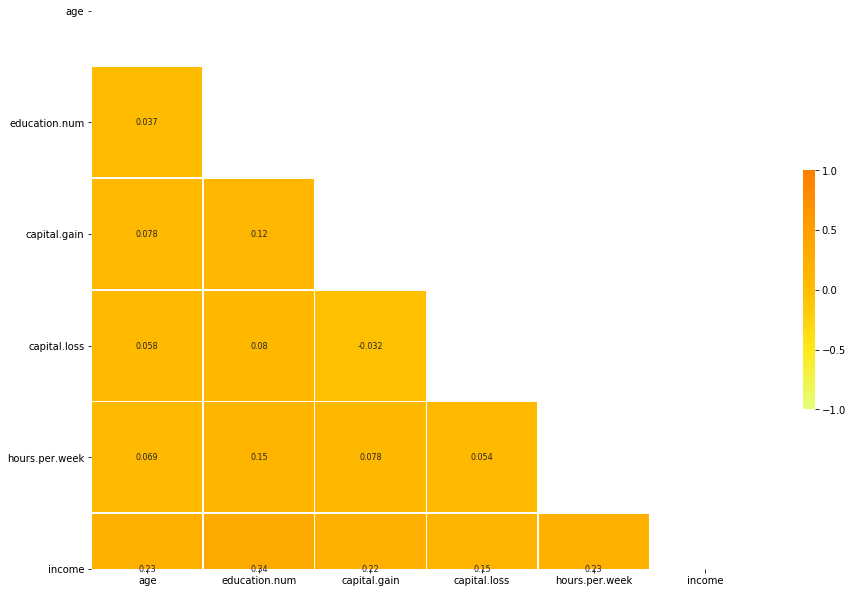

In [124]:
corr_matrix = df_knn.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(15, 11)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 8},
                      cmap="Wistia")
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.show()

In [125]:
correlations=pd.DataFrame(df_knn.corr()).replace({1:np.nan})

In [126]:
np.min(correlations)

age               0.036527
education.num     0.036527
capital.gain     -0.031615
capital.loss     -0.031615
hours.per.week    0.054256
income            0.150526
dtype: float64

In [127]:
np.min(np.min(correlations))

-0.03161506295218898

In [128]:
np.max(correlations)

age               0.234037
education.num     0.335154
capital.gain      0.223329
capital.loss      0.150526
hours.per.week    0.229689
income            0.335154
dtype: float64

In [129]:
np.max(np.max(correlations))

0.3351539526907601

    Capital gain and loss have the lowest correlation
    Income and education have the highest correlation

# Model Building

# Assumptions

### Linearity

In [130]:
df_nadropped.corr()

,age,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,0.043526,0.080154,0.060165,0.101599,0.241998
education.num,0.043526,1.000000,0.124416,0.079646,0.152522,0.335286
capital.gain,0.080154,0.124416,1.000000,-0.032229,0.080432,0.221196
capital.loss,0.060165,0.079646,-0.032229,1.000000,0.052417,0.150053
hours.per.week,0.101599,0.152522,0.080432,0.052417,1.000000,0.229480
income,0.241998,0.335286,0.221196,0.150053,0.229480,1.000000


    as we can see the correlation is very low and also the pair plots suggests very low to no linearity in the data

# Base models

In [131]:
x=df_nadropped.drop('income',1).select_dtypes(exclude='object')
y=df_nadropped.income
sm.Logit(y,x).fit().summary()

Optimization terminated successfully.
         Current function value: 0.535921
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                30162
Model:                          Logit   Df Residuals:                    30157
Method:                           MLE   Df Model:                            4
Date:                Thu, 30 Jul 2020   Pseudo R-squ.:                 0.04496
Time:                        17:41:18   Log-Likelihood:                -16164.
converged:                       True   LL-Null:                       -16925.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age               -0.0064      0.001     -6.790      0.000      -0.008      -0.005
education.num     -0.0346      0.004     -8.086      0.000      -0.043      -0.026
capital.gain       0.0003   8.86e-06     38.080      0.000       0.000       0.000
capital.loss       0.0008   2.96e-05     26.691      0.000       0.001       0.001
hours.per.week    -0.0158      0.001    -15.062      0.000      -0.018      -0.014
==================================================================================
"""

In [132]:
x=df_knn_num.drop('income',1)
y=df_knn_num.income
sm.Logit(y,x).fit().summary()

Optimization terminated successfully.
         Current function value: 0.385442
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                32561
Model:                          Logit   Df Residuals:                    32549
Method:                           MLE   Df Model:                           11
Date:                Thu, 30 Jul 2020   Pseudo R-squ.:                  0.3018
Time:                        17:41:48   Log-Likelihood:                -12550.
converged:                       True   LL-Null:                       -17974.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age               -0.0037      0.001     -2.759      0.006      -0.006      -0.001
workclass         -0.0667      0.011     -5.832      0.000      -0.089      -0.044
education.num      0.1675      0.007     22.906      0.000       0.153       0.182
marital.status     0.3988      0.012     34.585      0.000       0.376       0.421
occupation         0.1375      0.005     25.593      0.000       0.127       0.148
relationship       0.1437      0.020      7.090      0.000       0.104       0.183
race              -1.1378      0.028    -40.582      0.000      -1.193      -1.083
sex               -0.1555      0.039     -3.994      0.000      -0.232      -0.079
capital.gain       0.0003   9.48e-06     32.903      0.000       0.000       0.000
capital.loss       0.0007   3.35e-05     20.669      0.000       0.001       0.001
hours.per.week     0.0053      0.001      3.848      0.000       0.003       0.008
native.country    -0.0960      0.004    -24.243      0.000      -0.104      -0.088
==================================================================================
"""

    According to Logit we can see that all the variables are able to explain the variability
    Logistically it is able to explain about 53.59% of the data by using only the numericals and without null values

# Explanation of variability

In [133]:
x=df_knn_num.drop('income',1)
y=df_knn_num.income
dtc=DecisionTreeClassifier()
dtc.fit(x,y)
print(dtc.score(x,y))
pd.DataFrame(dtc.feature_importances_*100,index=x.columns,columns=["values"]).sort_values("values",ascending=False)

0.9762599428764472


,values
relationship,23.279021
age,16.860333
education.num,14.677478
capital.gain,11.961418
hours.per.week,10.357255
occupation,8.041549
capital.loss,4.147047
workclass,4.131447
native.country,2.294496
race,2.190401


    Relationship was able to expalin about 23.14% of variability while marital status was about 1.03%

# US models

In [134]:
train_accuracy=[]
test_accuracy=[]
test_roc_auc=[]
test_f1=[]
models=[]
data=[]
# new lists to capture the values

X=pd.get_dummies(df_us.drop('income',1))
y=df_us.income
# dividing the data into dependent and independent features

In [135]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
# splitting the data into training and testing data

In [136]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
# fitting the training data

print(logreg.score(X_train,y_train))
# training score

models.append("Logistic Regression")
data.append("US")
train_accuracy.append(logreg.score(X_train,y_train))

y_pred=logreg.predict(X_test)
# predictions made on the test data

test_accuracy.append(logreg.score(X_test,y_test))
# test accuracy

test_roc_auc=metrics.roc_auc_score(y_test,y_pred)
# roc auc score of test data

test_f1=metrics.f1_score(y_test,y_pred)
# f1 score of test data

0.7857766143106457


In [137]:
dtc=DecisionTreeClassifier(random_state=90)
dtc.fit(X_train,y_train)
# fitting the training data

dtc.score(X_train,y_train)
# training score

print(dtc.score(X_train,y_train))
models.append("Decision trees")
data.append("US")
train_accuracy.append(dtc.score(X_train,y_train))

y_pred=dtc.predict(X_test)
# predictions made on the test data

test_accuracy.append(dtc.score(X_test,y_test))
# test accuracy

test_roc_auc=metrics.roc_auc_score(y_test,y_pred)
# roc auc score of test data

test_f1=metrics.f1_score(y_test,y_pred)
# f1 score of test data

1.0


In [138]:
pd.DataFrame(dtc.feature_importances_*100,index=X_train.columns,columns=["values"]).sort_values("values",ascending=False)
# data frame with feature importances found through decision tree

,values
marital.status_Married-civ-spouse,20.466895
fnlwgt,18.800708
education.num,12.725241
age,11.522093
capital.gain,10.347758
hours.per.week,7.117302
capital.loss,3.679211
occupation_Exec-managerial,1.068896
workclass_Private,0.978533
occupation_Sales,0.965588


In [139]:
rf=RandomForestClassifier(random_state=90)
rf.fit(X_train,y_train)
# fitting the training data

rf.score(X_train,y_train)
# training score

print(rf.score(X_train,y_train))
models.append("Random Forest")
data.append("US")
train_accuracy.append(rf.score(X_train,y_train))

y_pred=rf.predict(X_test)
# predictions made on the test data

test_accuracy.append(rf.score(X_test,y_test))
# test accuracy

test_roc_auc=metrics.roc_auc_score(y_test,y_pred)
# roc auc score of test data

test_f1=metrics.f1_score(y_test,y_pred)
# f1 score of test data

0.9999515222028311


In [140]:
gbc=GradientBoostingClassifier(random_state=90)
gbc.fit(X_train,y_train)
# fitting the training data

gbc.score(X_train,y_train)
# training score

print(gbc.score(X_train,y_train))
models.append("Gradient Boost")
data.append("US")
train_accuracy.append(gbc.score(X_train,y_train))

y_pred=gbc.predict(X_test)
# predictions made on the test data

test_accuracy.append(gbc.score(X_test,y_test))
# test accuracy

test_roc_auc=metrics.roc_auc_score(y_test,y_pred)
# roc auc score of test data

test_f1=metrics.f1_score(y_test,y_pred)
# f1 score of test data

0.8646984681016094


In [141]:
pd.DataFrame({"data":data,"models":models,"train accuracy":train_accuracy,"test accuracy":test_accuracy,"roc_auc":test_roc_auc,"F1 score":test_f1})

# dataframe using the lists created

,data,models,train accuracy,test accuracy,roc_auc,F1 score
0,US,Logistic Regression,0.785777,0.787231,0.77414,0.685173
1,US,Decision trees,1.000000,0.807155,0.77414,0.685173
2,US,Random Forest,0.999952,0.849331,0.77414,0.685173
3,US,Gradient Boost,0.864698,0.859802,0.77414,0.685173


# Nan Dropped

In [142]:
train_accuracy=[]
test_accuracy=[]
test_roc_auc=[]
test_f1=[]
models=[]
data=[]
# new lists to capture trainin accuracy, test accuracy, test roc_Auc, f1score, model used and the data used

X=pd.get_dummies(df_nadropped.drop('income',1))
y=df_nadropped.income
# dividing into train and test datasets

ss=StandardScaler()
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
# standardising the data

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
# splitting the data into training and testing



### logistic regressions 
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
# fitting the train data

models.append("Logistic Regression")
data.append("Nan Dropped")
train_accuracy.append(logreg.score(X_train,y_train))

y_pred=logreg.predict(X_test)
# predicting on test data
test_accuracy.append(logreg.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))




### Naive Bayes
nb=GaussianNB()
nb.fit(X_train,y_train)
# fitting the train data

models.append("Naive Bayes")
data.append("Nan Dropped")
train_accuracy.append(nb.score(X_train,y_train))

y_pred=nb.predict(X_test)
# predicting on test data

test_accuracy.append(nb.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))




### decision trees
dtc=DecisionTreeClassifier(random_state=90)
dtc.fit(X_train,y_train)
# fitting the train data

models.append("Decision trees")
data.append("Nan Dropped")
train_accuracy.append(dtc.score(X_train,y_train))

y_pred=dtc.predict(X_test)
# predicting on test data

test_accuracy.append(dtc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))




## random forest
rf=RandomForestClassifier(random_state=90)
rf.fit(X_train,y_train)
# fitting the train data

models.append("Random Forest")
data.append("Nan Dropped")
train_accuracy.append(rf.score(X_train,y_train))

y_pred=rf.predict(X_test)
# predicting on test data

test_accuracy.append(rf.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))



## gradient boosting
gbc=GradientBoostingClassifier(random_state=90)
gbc.fit(X_train,y_train)
# fitting the train data

models.append("Gradient Boost")
data.append("Nan Dropped")
train_accuracy.append(gbc.score(X_train,y_train))

y_pred=gbc.predict(X_test)
# predicting on test data

test_accuracy.append(gbc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))



# Ada boost classifier
gbc=AdaBoostClassifier(random_state=90)
gbc.fit(X_train,y_train)
# fitting the train data

models.append("Ada Boost")
data.append("Nan Dropped")
train_accuracy.append(gbc.score(X_train,y_train))

y_pred=gbc.predict(X_test)
# predicting on test data
test_accuracy.append(gbc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))

pd.DataFrame({"data":data,"models":models,"train accuracy":train_accuracy,"test accuracy":test_accuracy,"roc_auc":test_roc_auc,"F1 score":test_f1})
# data frame with the lists

,data,models,train accuracy,test accuracy,roc_auc,F1 score
0,Nan Dropped,Logistic Regression,0.848725,0.850020,0.770142,0.669781
1,Nan Dropped,Naive Bayes,0.495380,0.491049,0.648904,0.485109
2,Nan Dropped,Decision trees,0.978692,0.810900,0.741963,0.614177
3,Nan Dropped,Random Forest,0.978648,0.844848,0.772576,0.668555
4,Nan Dropped,Gradient Boost,0.864595,0.862352,0.774611,0.684498
5,Nan Dropped,Ada Boost,0.855798,0.859302,0.776855,0.684320


# Frequent value imputation

In [143]:
train_accuracy=[]
test_accuracy=[]
test_roc_auc=[]
test_f1=[]
models=[]
data=[]
X=df_mode.drop('income',1)
y=df_mode.income

X.occupation=X.occupation.map(occ_dict)
X.workclass=X.workclass.map(wc_dict)
X.relationship=X.relationship.map(rel_dict)
X['native.country']=X['native.country'].map(country_dict)
X.race=X.race.map(race_dict)
X['marital.status']=X['marital.status'].map(ms_dict)
X.sex=df_knn.sex.map({'Female':0,'Male':1})

ss=StandardScaler()
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print(logreg.score(X_train,y_train))
models.append("Logistic Regression")
data.append("Mode")
train_accuracy.append(logreg.score(X_train,y_train))
y_pred=logreg.predict(X_test)
test_accuracy.append(logreg.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))

nb=GaussianNB()
nb.fit(X_train,y_train)
print(nb.score(X_train,y_train))
models.append("Naive Bayes")
data.append("Mode")
train_accuracy.append(nb.score(X_train,y_train))
y_pred=nb.predict(X_test)
test_accuracy.append(nb.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


dtc=DecisionTreeClassifier(random_state=90)
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
print(dtc.score(X_train,y_train))
models.append("Decision trees")
data.append("Mode")
train_accuracy.append(dtc.score(X_train,y_train))
y_pred=dtc.predict(X_test)
test_accuracy.append(dtc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


rf=RandomForestClassifier(random_state=90)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
print(rf.score(X_train,y_train))
models.append("Random Forest")
data.append("Mode")
train_accuracy.append(rf.score(X_train,y_train))
y_pred=rf.predict(X_test)
test_accuracy.append(rf.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


gbc=GradientBoostingClassifier(random_state=90)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train)
print(gbc.score(X_train,y_train))
models.append("Gradient Boost")
data.append("Mode")
train_accuracy.append(gbc.score(X_train,y_train))
y_pred=gbc.predict(X_test)
test_accuracy.append(gbc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))

gbc=AdaBoostClassifier(random_state=90)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train)
print(gbc.score(X_train,y_train))
models.append("Ada Boost")
data.append("Mode")
train_accuracy.append(gbc.score(X_train,y_train))
y_pred=gbc.predict(X_test)
test_accuracy.append(gbc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))

pd.DataFrame({"data":data,"models":models,"train accuracy":train_accuracy,"test accuracy":test_accuracy,"roc_auc":test_roc_auc,"F1 score":test_f1})

0.8476658476658476
0.8315724815724815
0.9780917280917281
0.978050778050778
0.8714168714168714
0.8601146601146601


,data,models,train accuracy,test accuracy,roc_auc,F1 score
0,Mode,Logistic Regression,0.847666,0.847070,0.756611,0.647009
1,Mode,Naive Bayes,0.831572,0.832207,0.748565,0.627590
2,Mode,Decision trees,0.978092,0.820661,0.755943,0.628876
3,Mode,Random Forest,0.978051,0.853458,0.776322,0.673419
4,Mode,Gradient Boost,0.871417,0.867707,0.784312,0.694121
5,Mode,Ada Boost,0.860115,0.862548,0.781785,0.686818


# KNN IMPUTED With Categoricals

In [144]:
train_accuracy=[]
test_accuracy=[]
test_roc_auc=[]
test_f1=[]
models=[]
data=[]
X=pd.get_dummies(df_knn.drop('income',1))
y=df_knn.income
ss=StandardScaler()
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print(logreg.score(X_train,y_train))
models.append("Logistic Regression")
data.append("Knn")
train_accuracy.append(logreg.score(X_train,y_train))
y_pred=logreg.predict(X_test)
test_accuracy.append(logreg.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))

nb=GaussianNB()
nb.fit(X_train,y_train)
print(nb.score(X_train,y_train))
models.append("Naive Bayes")
data.append("Knn")
train_accuracy.append(nb.score(X_train,y_train))
y_pred=nb.predict(X_test)
test_accuracy.append(nb.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))

dtc=DecisionTreeClassifier(random_state=90)
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
print(dtc.score(X_train,y_train))
models.append("Decision trees")
data.append("knn")
train_accuracy.append(dtc.score(X_train,y_train))
y_pred=dtc.predict(X_test)
test_accuracy.append(dtc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


rf=RandomForestClassifier(random_state=90)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
print(rf.score(X_train,y_train))
models.append("Random Forest")
data.append("Knn")
train_accuracy.append(rf.score(X_train,y_train))
y_pred=rf.predict(X_test)
test_accuracy.append(rf.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


gbc=GradientBoostingClassifier(random_state=90)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train)
print(gbc.score(X_train,y_train))
models.append("Gradient Boost")
data.append("Knn")
train_accuracy.append(gbc.score(X_train,y_train))
y_pred=gbc.predict(X_test)
test_accuracy.append(gbc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


gbc=AdaBoostClassifier(random_state=90)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train)
print(gbc.score(X_train,y_train))
models.append("Ada Boost")
data.append("knn")
train_accuracy.append(gbc.score(X_train,y_train))
y_pred=gbc.predict(X_test)
test_accuracy.append(gbc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


pd.DataFrame({"data":data,"models":models,"train accuracy":train_accuracy,"test accuracy":test_accuracy,"roc_auc":test_roc_auc,"F1 score":test_f1})

0.8531122031122031
0.4238329238329238
0.9786240786240786
0.9786240786240786
0.8695331695331695
0.8597461097461098


,data,models,train accuracy,test accuracy,roc_auc,F1 score
0,Knn,Logistic Regression,0.853112,0.848544,0.765421,0.657975
1,Knn,Naive Bayes,0.423833,0.422061,0.612256,0.449257
2,knn,Decision trees,0.978624,0.824714,0.754083,0.629254
3,Knn,Random Forest,0.978624,0.852475,0.778636,0.674966
4,Knn,Gradient Boost,0.869533,0.865004,0.776958,0.684105
5,knn,Ada Boost,0.859746,0.861442,0.779490,0.683502


# KNN Imputation with all numericals

In [145]:
train_accuracy=[]
test_accuracy=[]
test_roc_auc=[]
test_f1=[]
models=[]
data=[]
X=df_knn_num.drop('income',1)
y=df_knn_num.income

ss=StandardScaler()
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print(logreg.score(X_train,y_train))
models.append("Logistic Regression")
data.append("Knn_ num")
train_accuracy.append(logreg.score(X_train,y_train))
y_pred=logreg.predict(X_test)
test_accuracy.append(logreg.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))

nb=GaussianNB()
nb.fit(X_train,y_train)
print(nb.score(X_train,y_train))
models.append("Naive Bayes")
data.append("Knn_ num")
train_accuracy.append(nb.score(X_train,y_train))
y_pred=nb.predict(X_test)
test_accuracy.append(nb.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))



dtc=DecisionTreeClassifier(random_state=90)
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
print(dtc.score(X_train,y_train))
models.append("Decision trees")
data.append("Knn_ num")
train_accuracy.append(dtc.score(X_train,y_train))
y_pred=dtc.predict(X_test)
test_accuracy.append(dtc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


rf=RandomForestClassifier(random_state=90)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
print(rf.score(X_train,y_train))
models.append("Random Forest")
data.append("Knn_ num")
train_accuracy.append(rf.score(X_train,y_train))
y_pred=rf.predict(X_test)
test_accuracy.append(rf.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


gbc=GradientBoostingClassifier(random_state=90)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train)
print(gbc.score(X_train,y_train))
models.append("Gradient Boost")
data.append("Knn_num")
train_accuracy.append(gbc.score(X_train,y_train))
y_pred=gbc.predict(X_test)
test_accuracy.append(gbc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


gbc=AdaBoostClassifier(random_state=90)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train)
print(gbc.score(X_train,y_train))
models.append("Ada Boost")
data.append("Knn_ num")
train_accuracy.append(gbc.score(X_train,y_train))
y_pred=gbc.predict(X_test)
test_accuracy.append(gbc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


pd.DataFrame({"data":data,"models":models,"train accuracy":train_accuracy,"test accuracy":test_accuracy,"roc_auc":test_roc_auc,"F1 score":test_f1})

0.8486076986076986
0.8321867321867322
0.9786240786240786
0.9785831285831286
0.8723177723177723
0.8613022113022113


,data,models,train accuracy,test accuracy,roc_auc,F1 score
0,Knn_ num,Logistic Regression,0.848608,0.848176,0.759081,0.650650
1,Knn_ num,Naive Bayes,0.832187,0.833067,0.752441,0.632603
2,Knn_ num,Decision trees,0.978624,0.822503,0.753324,0.627097
3,Knn_ num,Random Forest,0.978583,0.853581,0.778319,0.675558
4,Knn_num,Gradient Boost,0.872318,0.869549,0.789358,0.700845
5,Knn_ num,Ada Boost,0.861302,0.866233,0.786303,0.694701


# Based on relationship 

#### roc_auc

NOT-IN-FAMILY
y shape :  (8305,)
X shape :  (8305, 73)
DTC best parameters :  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 17}
Naive Bayes: 0.838725 (0.000098)
Test accuracy :  0.8743379874819451
Test roc_auc :  0.6921242995670736
 
RandomForest: 0.833761 (0.000362)
Test accuracy :  0.9263360616273472
Test roc_auc :  0.6942249712803689
 
K Neighbors: 0.859892 (0.000294)
Test accuracy :  0.934520943668753
Test roc_auc :  0.6822429906542056
 
BoostedLR: 0.868858 (0.000018)
Test accuracy :  0.921039961482908
Test roc_auc :  0.6685240367009295
 
GBoost: 0.894932 (0.000066)
Test accuracy :  0.9297063071738084
Test roc_auc :  0.7250565613697133
 


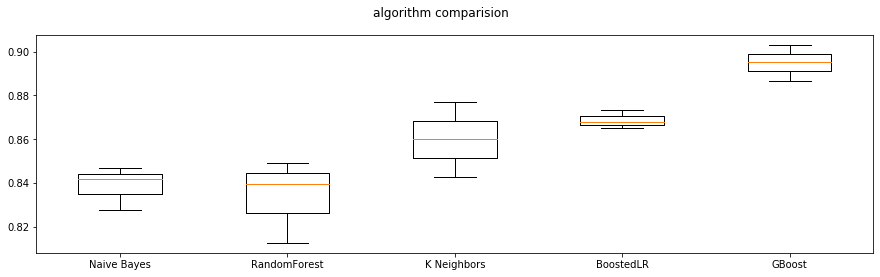

  
UNMARRIED
y shape :  (3446,)
X shape :  (3446, 69)
DTC best parameters :  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 7}
Naive Bayes: 0.816802 (0.000250)
Test accuracy :  0.771461716937355
Test roc_auc :  0.7339303818857722
 
RandomForest: 0.800607 (0.001910)
Test accuracy :  0.9373549883990719
Test roc_auc :  0.5768615523262363
 
K Neighbors: 0.837481 (0.000284)
Test accuracy :  0.9489559164733179
Test roc_auc :  0.6
 
BoostedLR: 0.883588 (0.000143)
Test accuracy :  0.9443155452436195
Test roc_auc :  0.6229356764672749
 
GBoost: 0.872424 (0.000374)
Test accuracy :  0.9361948955916474
Test roc_auc :  0.6440126168750704
 


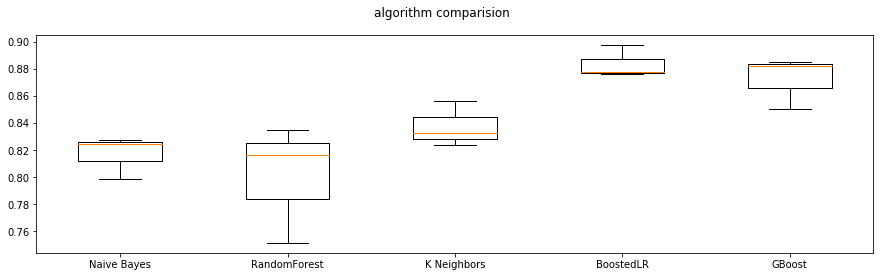

  
OWN-CHILD
y shape :  (5068,)
X shape :  (5068, 74)
DTC best parameters :  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 16}
Naive Bayes: 0.808852 (0.001154)
Test accuracy :  0.8011049723756906
Test roc_auc :  0.6671058823529411
 
RandomForest: 0.783452 (0.000806)
Test accuracy :  0.9857932123125493
Test roc_auc :  0.4996
 
K Neighbors: 0.778333 (0.008183)
Test accuracy :  0.988950276243094
Test roc_auc :  0.5882352941176471
 
BoostedLR: 0.917522 (0.003999)
Test accuracy :  0.984214680347277
Test roc_auc :  0.6148470588235293
 
GBoost: 0.862166 (0.005248)
Test accuracy :  0.9826361483820047
Test roc_auc :  0.6140470588235295
 


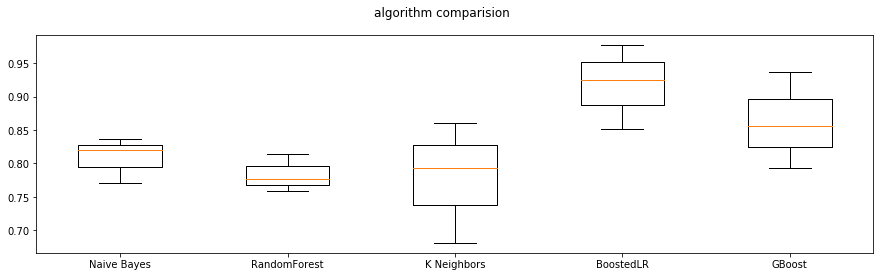

  
OTHER-RELATIVE
y shape :  (981,)
X shape :  (981, 69)
DTC best parameters :  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3}
Naive Bayes: 0.718281 (0.010243)
Test accuracy :  0.6788617886178862
Test roc_auc :  0.5126582278481012
 
RandomForest: 0.824815 (0.013038)
Test accuracy :  0.9634146341463414
Test roc_auc :  0.5
 
K Neighbors: 0.862664 (0.001280)
Test accuracy :  0.9552845528455285
Test roc_auc :  0.4957805907172996
 
BoostedLR: 0.899574 (0.001005)
Test accuracy :  0.959349593495935
Test roc_auc :  0.6047819971870605
 
GBoost: 0.907614 (0.002328)
Test accuracy :  0.9471544715447154
Test roc_auc :  0.5984528832630098
 


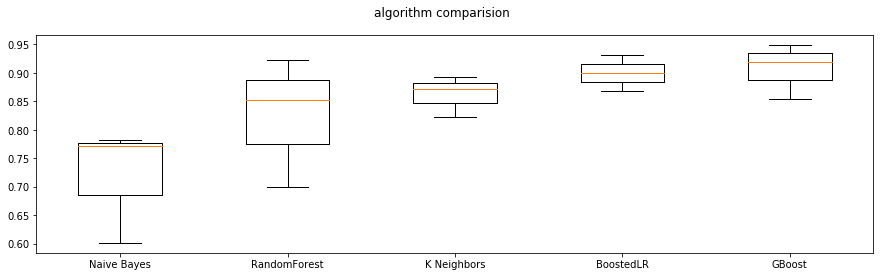

  
HUSBAND
y shape :  (13193,)
X shape :  (13193, 66)
DTC best parameters :  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 14}
Naive Bayes: 0.797317 (0.000124)
Test accuracy :  0.671415580478933
Test roc_auc :  0.6424724752239871
 
RandomForest: 0.777830 (0.000077)
Test accuracy :  0.7341618672324947
Test roc_auc :  0.7277045599750382
 
K Neighbors: 0.822949 (0.000001)
Test accuracy :  0.7293119127008184
Test roc_auc :  0.7181436934460574
 
BoostedLR: 0.798490 (0.000029)
Test accuracy :  0.7399211882388602
Test roc_auc :  0.7307865176886617
 
GBoost: 0.848236 (0.000007)
Test accuracy :  0.7599272506820248
Test roc_auc :  0.751950507406802
 


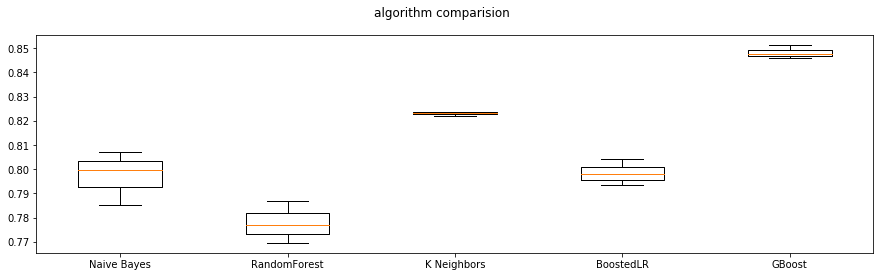

  
WIFE
y shape :  (1568,)
X shape :  (1568, 68)
DTC best parameters :  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 18}
Naive Bayes: 0.785796 (0.000212)
Test accuracy :  0.6198979591836735
Test roc_auc :  0.6085969307860946
 
RandomForest: 0.791253 (0.000129)
Test accuracy :  0.6785714285714286
Test roc_auc :  0.6748616765841946
 
K Neighbors: 0.760861 (0.000068)
Test accuracy :  0.6122448979591837
Test roc_auc :  0.611232905313707
 
BoostedLR: 0.791083 (0.000316)
Test accuracy :  0.6581632653061225
Test roc_auc :  0.6525733375091346
 
GBoost: 0.821979 (0.000309)
Test accuracy :  0.6224489795918368
Test roc_auc :  0.62198559348575
 


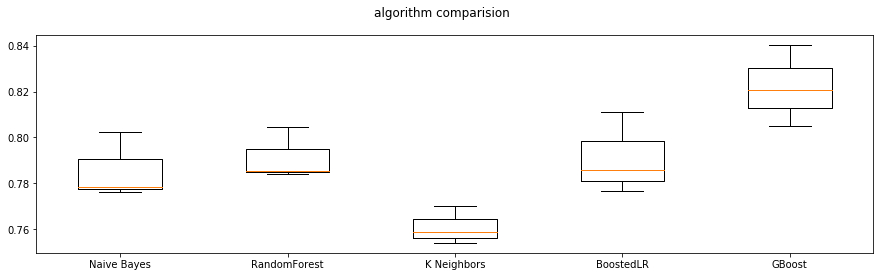

In [146]:
for relation in df_knn['relationship'].unique().tolist():
    # selecting the unique relationship categories
    
    print(relation.upper())
    # printing the relation type
    
    X=pd.get_dummies(df_knn[df_knn['relationship']==relation].drop('relationship',1),drop_first=True)
    y=X.income
    X=X.drop('income',1)
    # dividing into dependent and independent fetaures
    
    print("y shape : ",y.shape)
    print("X shape : ",X.shape)
  
    X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
    # dividing into training and testing
    
    Lr=LogisticRegression()

    dtc=DecisionTreeClassifier(random_state=90)
    param={'max_depth':np.arange(3,50),'min_samples_leaf':np.arange(3,20),'criterion':['gini','entropy']}
    # parameters grid 
    gs=GridSearchCV(dtc,param,cv=3,scoring='roc_auc')
    # with cross validation as 3 sets and measure as roc auc finding best hyper parameters
    gs.fit(X_train,y_train)
    print("DTC best parameters : ",gs.best_params_)
    # assigning the values of best hyper parameters to identifiers
    leafs=gs.best_params_['min_samples_leaf']
    depth=gs.best_params_['max_depth']
    criteria=gs.best_params_['criterion']

    knn=KNeighborsClassifier()
    param={'n_neighbors':np.arange(5,30), 'weights':['uniform','distance']}
    # parameters grid 
    gs=GridSearchCV(knn,param,cv=3,scoring='roc_auc')
    # with cross validation as 3 sets and measure as roc auc finding best hyper parameters
    gs.fit(X_train,y_train)
    gs.best_params_
    # assigning the values of best hyper parameters to identifiers
    neighbors=gs.best_params_['n_neighbors']
    weight=gs.best_params_['weights']

    LR=LogisticRegression()
    NB=GaussianNB()
    DTC=DecisionTreeClassifier(min_samples_leaf=leafs,max_depth=depth,criterion=criteria)
    KNN=KNeighborsClassifier(n_neighbors=neighbors,weights=weight)
    RF=RandomForestClassifier(n_estimators=18,random_state=90)
    AB=AdaBoostClassifier(n_estimators=94,random_state=90)
    ABL=AdaBoostClassifier(base_estimator=LR,n_estimators=19,random_state=90)
    GB=GradientBoostingClassifier(n_estimators=198)
    models = []

    models.append(('Naive Bayes',NB))
    models.append(('RandomForest',RF))
    models.append(('K Neighbors',KNN))
    models.append(('BoostedLR',ABL))
    models.append(('GBoost',GB))
      #evaluate each model in turn
    results = []
    names = []
    for name, model in models:
        # selecting the model
        kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=90)
        # k fold cross validation with 3 folds
        cv_results = model_selection.cross_val_score(model, X_train,y_train,cv=kfold, scoring='roc_auc')
        # 3 folds and roc auc as scoring metric
        results.append(cv_results)
        names.append(name)
        print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))
        # mean = mean accuracy , var = variance error
        predictions=model_selection.cross_val_predict(model,X_test,y_test,cv=3,n_jobs=-1)
        # predicting the test data
        print("Test accuracy : ",metrics.accuracy_score(y_test,predictions))
        print("Test roc_auc : ",metrics.roc_auc_score(y_test,predictions))
        print(" ")
    fig=plt.figure(figsize=(15,4))
    fig.suptitle("algorithm comparision")
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
      #print(pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['Actual <=50K','Actual >50K'],columns=['Predicted <=50K','Predicted >50K']))
      #print("  ")
    print("  ")

# KNN with smote

In [147]:
train_accuracy=[]
test_accuracy=[]
test_roc_auc=[]
test_f1=[]
models=[]
data=[]
X=df_knn_num.drop('income',1)
y=df_knn_num.income

smote=SMOTE()
ss=StandardScaler()
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)

X_train,y_train=smote.fit_sample(X_train,y_train)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print(logreg.score(X_train,y_train))
models.append("Logistic Regression")
data.append("Knn_smote")
train_accuracy.append(logreg.score(X_train,y_train))
y_pred=logreg.predict(X_test)
test_accuracy.append(logreg.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))

nb=GaussianNB()
nb.fit(X_train,y_train)
print(nb.score(X_train,y_train))
models.append("Naive Bayes")
data.append("Knn_smote")
train_accuracy.append(nb.score(X_train,y_train))
y_pred=nb.predict(X_test)
test_accuracy.append(nb.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))



dtc=DecisionTreeClassifier(random_state=90)
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
print(dtc.score(X_train,y_train))
models.append("Decision trees")
data.append("Knn_smote")
train_accuracy.append(dtc.score(X_train,y_train))
y_pred=dtc.predict(X_test)
test_accuracy.append(dtc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


rf=RandomForestClassifier(random_state=90)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
print(rf.score(X_train,y_train))
models.append("Random Forest")
data.append("Knn_smote")
train_accuracy.append(rf.score(X_train,y_train))
y_pred=rf.predict(X_test)
test_accuracy.append(rf.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


gbc=GradientBoostingClassifier(random_state=90)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train)
print(gbc.score(X_train,y_train))
models.append("Gradient Boost")
data.append("Knn_smote")
train_accuracy.append(gbc.score(X_train,y_train))
y_pred=gbc.predict(X_test)
test_accuracy.append(gbc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


gbc=AdaBoostClassifier(random_state=90)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train)
print(gbc.score(X_train,y_train))
models.append("Ada Boost")
data.append("Knn_smote")
train_accuracy.append(gbc.score(X_train,y_train))
y_pred=gbc.predict(X_test)
test_accuracy.append(gbc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))

pd.DataFrame({"data":data,"models":models,"train accuracy":train_accuracy,"test accuracy":test_accuracy,"roc_auc":test_roc_auc,"F1 score":test_f1})

0.8198122876099034
0.784778035492745
0.9847888235611414
0.9847888235611414
0.8682507147095313
0.8528507470737364


,data,models,train accuracy,test accuracy,roc_auc,F1 score
0,Knn_smote,Logistic Regression,0.819812,0.800147,0.814034,0.669510
1,Knn_smote,Naive Bayes,0.784778,0.816853,0.787406,0.657635
2,Knn_smote,Decision trees,0.984789,0.815133,0.753174,0.622712
3,Knn_smote,Random Forest,0.984789,0.848790,0.795373,0.687959
4,Knn_smote,Gradient Boost,0.868251,0.837612,0.836616,0.712233
5,Knn_smote,Ada Boost,0.852851,0.828768,0.829920,0.700601


# with arsc

##### with smote

In [148]:
df_arsc=df_knn.copy()
df_arsc['arsc']=df_knn.age*df_knn.race.map(race_dict)*df_knn.sex.map(sex_dict)*df_knn['native.country'].map(country_dict)
df_arsc.drop(['age','sex','race','native.country'],1,inplace=True)

smote=SMOTE()
train_accuracy=[]
test_accuracy=[]
test_roc_auc=[]
test_f1=[]
models=[]
data=[]
X=pd.get_dummies(df_arsc.drop('income',1),drop_first=True)
y=df_arsc.income

ss=StandardScaler()
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)

X_train,y_train=smote.fit_sample(X_train,y_train)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print(logreg.score(X_train,y_train))
models.append("Logistic Regression")
data.append("knn_arsc")
train_accuracy.append(logreg.score(X_train,y_train))
y_pred=logreg.predict(X_test)
test_accuracy.append(logreg.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


nb=GaussianNB()
nb.fit(X_train,y_train)
print(nb.score(X_train,y_train))
models.append("Naive Bayes")
data.append("knn_arsc")
train_accuracy.append(nb.score(X_train,y_train))
y_pred=nb.predict(X_test)
test_accuracy.append(nb.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))



dtc=DecisionTreeClassifier(random_state=90)
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
print(dtc.score(X_train,y_train))
models.append("Decision trees")
data.append("knn_arsc")
train_accuracy.append(dtc.score(X_train,y_train))
y_pred=dtc.predict(X_test)
test_accuracy.append(dtc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


rf=RandomForestClassifier(random_state=90)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
print(rf.score(X_train,y_train))
models.append("Random Forest")
data.append("knn_arsc")
train_accuracy.append(rf.score(X_train,y_train))
y_pred=rf.predict(X_test)
test_accuracy.append(rf.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


gbc=GradientBoostingClassifier(random_state=90)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train)
print(gbc.score(X_train,y_train))
models.append("Gradient Boost")
data.append("knn_arsc")
train_accuracy.append(gbc.score(X_train,y_train))
y_pred=gbc.predict(X_test)
test_accuracy.append(gbc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))



gbc=AdaBoostClassifier(random_state=90)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train)
print(gbc.score(X_train,y_train))
models.append("Ada Boost")
data.append("knn_arsc")
train_accuracy.append(gbc.score(X_train,y_train))
y_pred=gbc.predict(X_test)
test_accuracy.append(gbc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


pd.DataFrame({"data":data,"models":models,"train accuracy":train_accuracy,"test accuracy":test_accuracy,"roc_auc":test_roc_auc,"F1 score":test_f1})

0.8259075462538432
0.6792437564054156
0.9845460920222234
0.9845460920222234
0.8608608878580291
0.8496143265548304


,data,models,train accuracy,test accuracy,roc_auc,F1 score
0,knn_arsc,Logistic Regression,0.825908,0.805798,0.819497,0.677149
1,knn_arsc,Naive Bayes,0.679244,0.519961,0.675159,0.494306
2,knn_arsc,Decision trees,0.984546,0.814519,0.759564,0.629175
3,knn_arsc,Random Forest,0.984546,0.835033,0.787184,0.669781
4,knn_arsc,Gradient Boost,0.860861,0.821275,0.828993,0.694520
5,knn_arsc,Ada Boost,0.849614,0.822995,0.825944,0.693469


###### without smote

In [149]:
df_arsc=df_knn.copy()
df_arsc['arsc']=df_knn.age*df_knn.race.map(race_dict)*df_knn.sex.map(sex_dict)*df_knn['native.country'].map(country_dict)
df_arsc.drop(['age','sex','race','native.country'],1,inplace=True)

smote=SMOTE()
train_accuracy=[]
test_accuracy=[]
test_roc_auc=[]
test_f1=[]
models=[]
data=[]
X=pd.get_dummies(df_arsc.drop('income',1),drop_first=True)
y=df_arsc.income

ss=StandardScaler()
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print(logreg.score(X_train,y_train))
models.append("Logistic Regression")
data.append("knn_arsc")
train_accuracy.append(logreg.score(X_train,y_train))
y_pred=logreg.predict(X_test)
test_accuracy.append(logreg.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


nb=GaussianNB()
nb.fit(X_train,y_train)
print(nb.score(X_train,y_train))
models.append("Naive Bayes")
data.append("knn_arsc")
train_accuracy.append(nb.score(X_train,y_train))
y_pred=nb.predict(X_test)
test_accuracy.append(nb.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))



dtc=DecisionTreeClassifier(random_state=90)
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
print(dtc.score(X_train,y_train))
models.append("Decision trees")
data.append("knn_arsc")
train_accuracy.append(dtc.score(X_train,y_train))
y_pred=dtc.predict(X_test)
test_accuracy.append(dtc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


rf=RandomForestClassifier(random_state=90)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
print(rf.score(X_train,y_train))
models.append("Random Forest")
data.append("knn_arsc")
train_accuracy.append(rf.score(X_train,y_train))
y_pred=rf.predict(X_test)
test_accuracy.append(rf.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


gbc=GradientBoostingClassifier(random_state=90)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train)
print(gbc.score(X_train,y_train))
models.append("Gradient Boost")
data.append("knn_arsc")
train_accuracy.append(gbc.score(X_train,y_train))
y_pred=gbc.predict(X_test)
test_accuracy.append(gbc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))



gbc=AdaBoostClassifier(random_state=90)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train)
print(gbc.score(X_train,y_train))
models.append("Ada Boost")
data.append("knn_arsc")
train_accuracy.append(gbc.score(X_train,y_train))
y_pred=gbc.predict(X_test)
test_accuracy.append(gbc.score(X_test,y_test))
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
test_f1.append(metrics.f1_score(y_test,y_pred))


pd.DataFrame({"data":data,"models":models,"train accuracy":train_accuracy,"test accuracy":test_accuracy,"roc_auc":test_roc_auc,"F1 score":test_f1})

0.8522932022932023
0.5217444717444717
0.978009828009828
0.977968877968878
0.8688370188370188
0.8602375102375103


,data,models,train accuracy,test accuracy,roc_auc,F1 score
0,knn_arsc,Logistic Regression,0.852293,0.850510,0.767238,0.661474
1,knn_arsc,Naive Bayes,0.521744,0.517872,0.673959,0.493352
2,knn_arsc,Decision trees,0.978010,0.823977,0.756385,0.631335
3,knn_arsc,Random Forest,0.977969,0.848422,0.772657,0.665583
4,knn_arsc,Gradient Boost,0.868837,0.868689,0.782694,0.693433
5,knn_arsc,Ada Boost,0.860238,0.863039,0.781412,0.686886


In [150]:
df_arsc=df_knn_num.copy()
df_arsc['arsc']=df_knn.age*df_knn_num.race*df_knn.sex.map(sex_dict)*df_knn_num['native.country']
df_arsc.drop(['age','sex','race','native.country'],1,inplace=True)

x=df_arsc.drop('income',1)
y=df_arsc.income
dtc=DecisionTreeClassifier(random_state=90)
dtc.fit(x,y)
print(dtc.score(x,y))
pd.DataFrame(dtc.feature_importances_*100,index=x.columns,columns=["values"]).sort_values("values",ascending=False)

0.9755535763643622


,values
relationship,23.133342
arsc,20.940334
education.num,15.014382
capital.gain,11.964441
hours.per.week,10.713705
occupation,8.215745
workclass,4.580178
capital.loss,4.053813
marital.status,1.384062


# comparision

## Entire data

In [151]:
data=[]
train_accuracy=[]

# dropping null values
X=pd.get_dummies(df_nadropped.drop('income',1),drop_first=True)
y=df_nadropped.income
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
gbc=AdaBoostClassifier(random_state=90)
gbc.fit(X_train,y_train)
data.append("Without null")
train_accuracy.append(gbc.score(X_train,y_train))

# only us data
X=pd.get_dummies(df_us.drop('income',1),drop_first=True)
y=df_us.income
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
gbc=AdaBoostClassifier(random_state=90)
gbc.fit(X_train,y_train)
data.append("United states")
train_accuracy.append(gbc.score(X_train,y_train))


#knn imputation
X=pd.get_dummies(df_knn.drop('income',1),drop_first=True)
y=df_knn.income
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
gbc=AdaBoostClassifier(random_state=90)
gbc.fit(X_train,y_train)
data.append("KNN imputation")
train_accuracy.append(gbc.score(X_train,y_train))

#knn with arsc
X=pd.get_dummies(df_arsc.drop('income',1),drop_first=True)
y=df_arsc.income
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
gbc=AdaBoostClassifier(random_state=90)
gbc.fit(X_train,y_train)
data.append("With arsc")
train_accuracy.append(gbc.score(X_train,y_train))



pd.DataFrame({"train accuracy":train_accuracy},index=data)

,train accuracy
Without null,0.855090
United states,0.858736
KNN imputation,0.859419
With arsc,0.861794


### train test split

In [152]:
data=[]
train_accuracy=[]
test_accuracy=[]
roc_auc=[]
f1=[]

# dropping null values
X=pd.get_dummies(df_nadropped.drop('income',1),drop_first=True)
y=df_nadropped.income
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
gbc=AdaBoostClassifier(random_state=90)
gbc.fit(X_train,y_train)
data.append("Without null")
train_accuracy.append(gbc.score(X_train,y_train))
test_accuracy.append(gbc.score(X_test,y_test))
y_pred=gbc.predict(X_test)
roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
f1.append(metrics.f1_score(y_test,y_pred))

# only us data
X=pd.get_dummies(df_us.drop('income',1),drop_first=True)
y=df_us.income
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
gbc=AdaBoostClassifier(random_state=90)
gbc.fit(X_train,y_train)
data.append("United states")
train_accuracy.append(gbc.score(X_train,y_train))
test_accuracy.append(gbc.score(X_test,y_test))
y_pred=gbc.predict(X_test)
roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
f1.append(metrics.f1_score(y_test,y_pred))

#knn imputation
X=pd.get_dummies(df_knn.drop('income',1),drop_first=True)
y=df_knn.income
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
gbc=AdaBoostClassifier(random_state=90)
gbc.fit(X_train,y_train)
data.append("KNN imputation")
train_accuracy.append(gbc.score(X_train,y_train))
test_accuracy.append(gbc.score(X_test,y_test))
y_pred=gbc.predict(X_test)
roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
f1.append(metrics.f1_score(y_test,y_pred))

#knn with arsc
X=pd.get_dummies(df_arsc.drop('income',1),drop_first=True)
y=df_arsc.income
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
gbc=AdaBoostClassifier(random_state=90)
gbc.fit(X_train,y_train)
data.append("With arsc")
train_accuracy.append(gbc.score(X_train,y_train))
test_accuracy.append(gbc.score(X_test,y_test))
y_pred=gbc.predict(X_test)
roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
f1.append(metrics.f1_score(y_test,y_pred))


pd.DataFrame({"train accuracy":train_accuracy,"test accuracy":test_accuracy,"roc auc":roc_auc,"f1 score":f1},index=data)

,train accuracy,test accuracy,roc auc,f1 score
Without null,0.855090,0.859170,0.773739,0.680889
United states,0.858736,0.852967,0.774265,0.679962
KNN imputation,0.859419,0.862548,0.780740,0.685762
With arsc,0.861794,0.863653,0.781817,0.687852


### Base models with Decision tree classifiers

In [153]:
data=[]
train_accuracy=[]
test_accuracy=[]
roc_auc=[]
f1=[]

# dropping null values
X=pd.get_dummies(df_nadropped.drop('income',1),drop_first=True)
y=df_nadropped.income
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
data.append("Without null")
train_accuracy.append(dtc.score(X_train,y_train))
test_accuracy.append(dtc.score(X_test,y_test))
y_pred=dtc.predict(X_test)
roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
f1.append(metrics.f1_score(y_test,y_pred))

# only us data
X=pd.get_dummies(df_us.drop('income',1),drop_first=True)
y=df_us.income
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
data.append("United states")
train_accuracy.append(dtc.score(X_train,y_train))
test_accuracy.append(dtc.score(X_test,y_test))
y_pred=dtc.predict(X_test)
roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
f1.append(metrics.f1_score(y_test,y_pred))

#knn imputation
X=pd.get_dummies(df_knn.drop('income',1),drop_first=True)
y=df_knn.income
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
data.append("KNN imputation")
train_accuracy.append(dtc.score(X_train,y_train))
test_accuracy.append(dtc.score(X_test,y_test))
y_pred=dtc.predict(X_test)
roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
f1.append(metrics.f1_score(y_test,y_pred))

#knn with arsc
X=pd.get_dummies(df_arsc.drop('income',1),drop_first=True)
y=df_arsc.income
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
data.append("With arsc")
train_accuracy.append(dtc.score(X_train,y_train))
test_accuracy.append(dtc.score(X_test,y_test))
y_pred=gbc.predict(X_test)
roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
f1.append(metrics.f1_score(y_test,y_pred))


pd.DataFrame({"train accuracy":train_accuracy,"test accuracy":test_accuracy,"roc auc":roc_auc,"f1 score":f1},index=data)

,train accuracy,test accuracy,roc auc,f1 score
Without null,0.978692,0.809707,0.742059,0.613728
United states,1.000000,0.804538,0.748571,0.622896
KNN imputation,0.978624,0.821029,0.749043,0.621460
With arsc,0.978010,0.822749,0.781817,0.687852


In [154]:
for i in [df_nadropped,df_us,df_knn,df_arsc]:
    X=pd.get_dummies(i.drop('income',1),drop_first=True)
    y=i['income']
    logreg=LogisticRegression()
    logreg.fit(X,y)
    print(logreg.score(X,y))

0.8175518864796764
0.7868310063990692
0.8289671693129818
0.7793986671171033


In [155]:
for i in [df_nadropped,df_us,df_knn,df_arsc]:
    X=pd.get_dummies(i.drop('income',1),drop_first=True)
    y=i['income']
    sm.Logit(y,sm.add_constant(X)).fit().summary()

         Current function value: 0.324122
         Iterations: 35
         Current function value: 0.328292
         Iterations: 35
         Current function value: 0.317102
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.324965
         Iterations 8


In [156]:
data=[]
train_accuracy=[]
test_accuracy=[]
roc_auc=[]
f1=[]

# dropping null values
X=pd.get_dummies(df_nadropped.drop('income',1),drop_first=True)
y=df_nadropped.income
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
dtc=LogisticRegression()
dtc.fit(X_train,y_train)
data.append("Without null")
train_accuracy.append(dtc.score(X_train,y_train))
test_accuracy.append(dtc.score(X_test,y_test))
y_pred=dtc.predict(X_test)
roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
f1.append(metrics.f1_score(y_test,y_pred))

# only us data
X=pd.get_dummies(df_us.drop('income',1),drop_first=True)
y=df_us.income
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
dtc=LogisticRegression()
dtc.fit(X_train,y_train)
data.append("United states")
train_accuracy.append(dtc.score(X_train,y_train))
test_accuracy.append(dtc.score(X_test,y_test))
y_pred=dtc.predict(X_test)
roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
f1.append(metrics.f1_score(y_test,y_pred))

#knn imputation
X=pd.get_dummies(df_knn.drop('income',1),drop_first=True)
y=df_knn.income
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
dtc=LogisticRegression()
dtc.fit(X_train,y_train)
data.append("KNN imputation")
train_accuracy.append(dtc.score(X_train,y_train))
test_accuracy.append(dtc.score(X_test,y_test))
y_pred=dtc.predict(X_test)
roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
f1.append(metrics.f1_score(y_test,y_pred))

#knn with arsc
X=pd.get_dummies(df_arsc.drop('income',1),drop_first=True)
y=df_arsc.income
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
dtc=LogisticRegression()
dtc.fit(X_train,y_train)
data.append("With arsc")
train_accuracy.append(dtc.score(X_train,y_train))
test_accuracy.append(dtc.score(X_test,y_test))
y_pred=dtc.predict(X_test)
roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
f1.append(metrics.f1_score(y_test,y_pred))


pd.DataFrame({"train accuracy":train_accuracy,"test accuracy":test_accuracy,"roc auc":roc_auc,"f1 score":f1},index=data)

,train accuracy,test accuracy,roc auc,f1 score
Without null,0.835463,0.837953,0.747860,0.635876
United states,0.785777,0.787231,0.617737,0.394704
KNN imputation,0.839189,0.840192,0.748597,0.632797
With arsc,0.789640,0.795971,0.632893,0.429013


# BINNING

In [159]:
binning=df_nadropped.copy()

#Marital status into complete and incomplete families
ms_bin={'Never-married':'Never-married',
       'Separated':'Incomplete family',
       'Divorced':'Incomplete family',
       'Widowed':'Incomplete family',
       'Married-spouse-absent':'Incomplete family',
       'Married-civ-spouse':'Complete family',
       'Married-AF-spouse':'Complete family'}


#Workclass into private, self employed and government 
wc_bin={'Without-pay':'Without-pay',
       'Private':'Private',
       'Self-emp-not-inc':'Self employed',
       'Self-emp-inc':'Self employed',
       'State-gov':'Government',
       'Federal-gov':'Government',
       'Local-gov':'Government'}


# occupation into manual, intellectual and Mixed
occ_bin={'Craft-repair':'Manual',
        'Handlers-cleaners':'Manual',
        'Farming-fishing':'Manual',
        'Transport-moving':'Manual',
        'Priv-house-serv':'Manual',
        'Protective-serv':'Manual',
        'Tech-support':'Intellectual',
        'Sales':'Intellectual',
        'Exec-managerial':'Intellectual',
        'Prof-speciality':'Intellectual',
        'Adm-clerical':'Intellectual',
        'Machine-op-inspct':'Mixed',
        'Armed-Forces':'Mixed',
        'Other-service':'Mixed'}

binning.workclass=binning.workclass.map(wc_bin)
binning.occupation=binning.occupation.map(occ_bin)
binning['marital.status']=binning['marital.status'].map(ms_bin)


train_accuracy=[]
test_accuracy=[]
roc_auc=[]
f1=[]
models=[]
data=[]
X=pd.get_dummies(binning.drop('income',1),drop_first=True)
y=binning.income




ss=StandardScaler()
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)

X_train,y_train=smote.fit_sample(X_train,y_train)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print(logreg.score(X_train,y_train))
models.append("Logistic Regression")
data.append("binnned")
train_accuracy.append(logreg.score(X_train,y_train))
y_pred=logreg.predict(X_test)
test_accuracy.append(logreg.score(X_test,y_test))
roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
f1.append(metrics.f1_score(y_test,y_pred))

nb=GaussianNB()
nb.fit(X_train,y_train)
print(nb.score(X_train,y_train))
models.append("Naive Bayes")
data.append("binnned")
train_accuracy.append(nb.score(X_train,y_train))
y_pred=nb.predict(X_test)
test_accuracy.append(nb.score(X_test,y_test))
roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
f1.append(metrics.f1_score(y_test,y_pred))


dtc=DecisionTreeClassifier(random_state=90)
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
print(dtc.score(X_train,y_train))
models.append("Decision trees")
data.append("binnned")
train_accuracy.append(dtc.score(X_train,y_train))
y_pred=dtc.predict(X_test)
test_accuracy.append(dtc.score(X_test,y_test))
roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
f1.append(metrics.f1_score(y_test,y_pred))


rf=RandomForestClassifier(random_state=90)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
print(rf.score(X_train,y_train))
models.append("Random Forest")
data.append("binnned")
train_accuracy.append(rf.score(X_train,y_train))
y_pred=rf.predict(X_test)
test_accuracy.append(rf.score(X_test,y_test))
roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
f1.append(metrics.f1_score(y_test,y_pred))


gbc=GradientBoostingClassifier(random_state=90)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train)
print(gbc.score(X_train,y_train))
models.append("Gradient Boost")
data.append("binnned")
train_accuracy.append(gbc.score(X_train,y_train))
y_pred=gbc.predict(X_test)
test_accuracy.append(gbc.score(X_test,y_test))
roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
f1.append(metrics.f1_score(y_test,y_pred))

gbc=AdaBoostClassifier(random_state=90)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train)
print(gbc.score(X_train,y_train))
models.append("Ada Boost")
data.append("binnned")
train_accuracy.append(gbc.score(X_train,y_train))
y_pred=gbc.predict(X_test)
test_accuracy.append(gbc.score(X_test,y_test))
roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
f1.append(metrics.f1_score(y_test,y_pred))


pd.DataFrame({"data":data,"models":models,"train accuracy":train_accuracy,"test accuracy":test_accuracy,"roc_auc":roc_auc,"F1 score":f1})

0.8201589170100059
0.6265450264861684
0.9718658034137728
0.9718658034137728
0.8564155385520895
0.8433195997645674


,data,models,train accuracy,test accuracy,roc_auc,F1 score
0,binnned,Logistic Regression,0.820159,0.802413,0.813789,0.678186
1,binnned,Naive Bayes,0.626545,0.450603,0.624651,0.468096
2,binnned,Decision trees,0.971866,0.807585,0.749552,0.621248
3,binnned,Random Forest,0.971866,0.832516,0.785739,0.673052
4,binnned,Gradient Boost,0.856416,0.816735,0.820473,0.692205
5,binnned,Ada Boost,0.843320,0.818990,0.821083,0.694152
